In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path='/content/drive/MyDrive/Data set/Levine_32dim_notransform.csv'
df = pd.read_csv(file_path)
df.head()
df_original=df
df.columns


Index(['Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19',
       'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4',
       'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c',
       'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117',
       'CD49d', 'HLA-DR', 'CD64', 'CD41', 'Viability', 'file_number',
       'event_number', 'label', 'individual'],
      dtype='object')

In [ ]:
df = df.drop(columns=['Time','file_number', 'event_number'])

len(df.columns)


38

In [ ]:
df

Cell_length         DNA1         DNA2     CD45RA     CD133      CD19  \
0                22   201.783295   253.016647   0.817049 -0.147947 -0.033482   
1                35   191.828598   308.869080   3.801385 -0.191446 -0.083274   
2                32   116.111923   200.839218   3.204439 -0.161106  0.369613   
3                29   176.248505   313.022461   2.237382 -0.138071 -0.088311   
4                25   133.332779   226.467758  -0.044047 -0.151509  0.402548   
...             ...          ...          ...        ...       ...       ...   
265622           41  2305.191162  3131.641357  10.345075 -0.095875 -0.278241   
265623           45  2217.376953  3198.114258   0.585101 -0.281215 -0.044320   
265624           41  2455.673340  3157.416260   3.698715 -0.031322 -0.130569   
265625           39  2395.883789  3167.325439   1.463955 -0.056550 -0.244025   
265626           41  2450.653320  3113.955078   1.843143  0.644794 -0.034668   

            CD22       CD11b        CD4       CD8  ...         CD3      CD61  \
0       0.332183   -0.045922   1.858334  2.719878  ...   -0.163008 -0.014681   
1       0.372388    4.494379  -0.177158 -0.052758  ...   -0.217398  8.089547   
2      -0.214952   -0.009404  -0.043904 -0.028160  ...    1.631609  1.299899   
3      -0.220430    4.006598  -0.095335  0.280690  ...    0.302398 -0.205759   
4       2.581769    6.742060   2.906627  0.156578  ...    0.688083  0.847043   
...          ...         ...        ...       ...  ...         ...       ...   
265622 -0.036303    0.317188   0.729079  1.831931  ...  365.476898  4.857436   
265623 -0.175828   -0.209287   5.648056 -0.119528  ...  415.338989  2.978710   
265624 -0.154208   -0.173241  11.841664  1.303762  ...  409.246887 -0.043400   
265625  0.370252   -0.158964   0.394406 -0.004772  ...   -0.074272 -0.146755   
265626  0.550337  119.171364   4.389215  0.566398  ...    0.863965 -0.119167   

           CD117      CD49d       HLA-DR      CD64      CD41  Viability  \
0       0.265375   4.804858    12.734092 -0.026878 -0.009804   3.474168   
1       0.448901   0.995556     2.558165  0.726602  4.905976   2.956692   
2       0.231194  33.025459     8.574364 -0.054804 -0.052067   3.443209   
3       0.332596   8.879428     0.704930 -0.067247 -0.130211  -0.132632   
4      -0.031117   0.909562     0.993077  0.381205 -0.202496   1.435457   
...          ...        ...          ...       ...       ...        ...   
265622 -0.055526   2.797205     0.620372 -0.212540 -0.139874   1.195905   
265623  0.721827   8.194910     0.236164 -0.039998 -0.129067  -0.017502   
265624  0.436060  -0.279705     2.614141  0.269550 -0.213073   0.537059   
265625 -0.239947   0.510660  1231.869141  1.506284  0.969914   3.307683   
265626  0.401405   0.189855    98.570404 -0.004392 -0.262749   1.577387   

        label  individual  
0         1.0           1  
1         1.0           1  
2         1.0           1  
3         1.0           1  
4         1.0           1  
...       ...         ...  
265622    NaN           2  
265623    NaN           2  
265624    NaN           2  
265625    NaN           2  
265626    NaN           2  

[265627 rows x 38 columns]

# **EDA** **TECHNIQUES**

In [ ]:
df['Viability']

0         3.474168
1         2.956692
2         3.443209
3        -0.132632
4         1.435457
            ...   
265622    1.195905
265623   -0.017502
265624    0.537059
265625    3.307683
265626    1.577387
Name: Viability, Length: 265627, dtype: float64

In [ ]:
df.describe()

Cell_length           DNA1           DNA2         CD45RA  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean       34.450572     641.595743     933.466175       4.931193   
std        11.446694     865.915665    1140.667186      11.441369   
min        10.000000      40.405746      23.133020      -0.286683   
25%        26.000000     101.058731     205.195770       1.030280   
50%        33.000000     139.504501     274.409729       2.887218   
75%        41.000000    1435.977539    2170.162109       6.119610   
max        65.000000    2745.666504    4396.652344    2013.210327   

               CD133           CD19           CD22          CD11b  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean        0.793498       5.271011       4.163378       9.763344   
std         1.959306      12.016138      12.033168      25.639445   
min        -0.290567      -0.290608      -0.286868      -0.291343   
25%        -0.114685      -0.094195      -0.103454      -0.001472   
50%         0.126780       0.376405       0.294120       1.303963   
75%         1.130925       2.881442       1.980871       5.302530   
max       628.772461     367.355286     435.604523     481.570679   

                 CD4            CD8  ...            CD3           CD61  \
count  265627.000000  265627.000000  ...  265627.000000  265627.000000   
mean        2.445791       7.696787  ...     144.290310      11.701504   
std        10.129736      18.567283  ...     206.352548     125.850474   
min        -0.288916      -0.290179  ...      -0.291369      -0.288369   
25%        -0.062952      -0.086614  ...       0.425243      -0.064268   
50%         0.657973       0.368501  ...       3.205550       0.479184   
75%         3.054322       2.529152  ...     265.449539       2.139377   
max      1804.521118     273.117188  ...    2131.651123    5795.214844   

               CD117          CD49d         HLA-DR           CD64  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean        0.835540       5.670704      54.733557       6.094768   
std         3.501664       7.165016     129.749504      14.202635   
min        -0.288499      -0.290482      -0.290032      -0.291160   
25%        -0.119796       1.434031       0.288704      -0.052912   
50%        -0.002051       3.650880       3.250659       0.613995   
75%         0.776773       7.464218      44.764992       3.207780   
max       613.020752     432.548889    2889.378906     229.066956   

                CD41      Viability          label     individual  
count  265627.000000  265627.000000  104184.000000  265627.000000  
mean        6.457237       3.801818       8.116102       1.279625  
std        72.751563       4.924496       2.457486       0.448816  
min        -0.291384      -0.290059       1.000000       1.000000  
25%        -0.100838       0.327849       7.000000       1.000000  
50%         0.261263       2.044197       8.000000       1.000000  
75%         1.551849       5.357637      10.000000       2.000000  
max      5622.765137      28.263973      14.000000       2.000000  

[8 rows x 38 columns]

In [ ]:
#Information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265627 entries, 0 to 265626
Data columns (total 38 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cell_length  265627 non-null  int64  
 1   DNA1         265627 non-null  float64
 2   DNA2         265627 non-null  float64
 3   CD45RA       265627 non-null  float64
 4   CD133        265627 non-null  float64
 5   CD19         265627 non-null  float64
 6   CD22         265627 non-null  float64
 7   CD11b        265627 non-null  float64
 8   CD4          265627 non-null  float64
 9   CD8          265627 non-null  float64
 10  CD34         265627 non-null  float64
 11  Flt3         265627 non-null  float64
 12  CD20         265627 non-null  float64
 13  CXCR4        265627 non-null  float64
 14  CD235ab      265627 non-null  float64
 15  CD45         265627 non-null  float64
 16  CD123        265627 non-null  float64
 17  CD321        265627 non-null  float64
 18  CD14         265627 non-

In [ ]:
# Calculate label and unlabel percentage
label_count = df['label'].count()
unlabel_count = df['label'].isna().sum()

label_percentage = (label_count / len(df)) * 100
unlabel_percentage = (unlabel_count / len(df)) * 100

print(f"Label percentage: {label_percentage:.2f}%")
print(f"Unlabel percentage: {unlabel_percentage:.2f}%")

Label percentage: 39.22%
Unlabel percentage: 60.78%


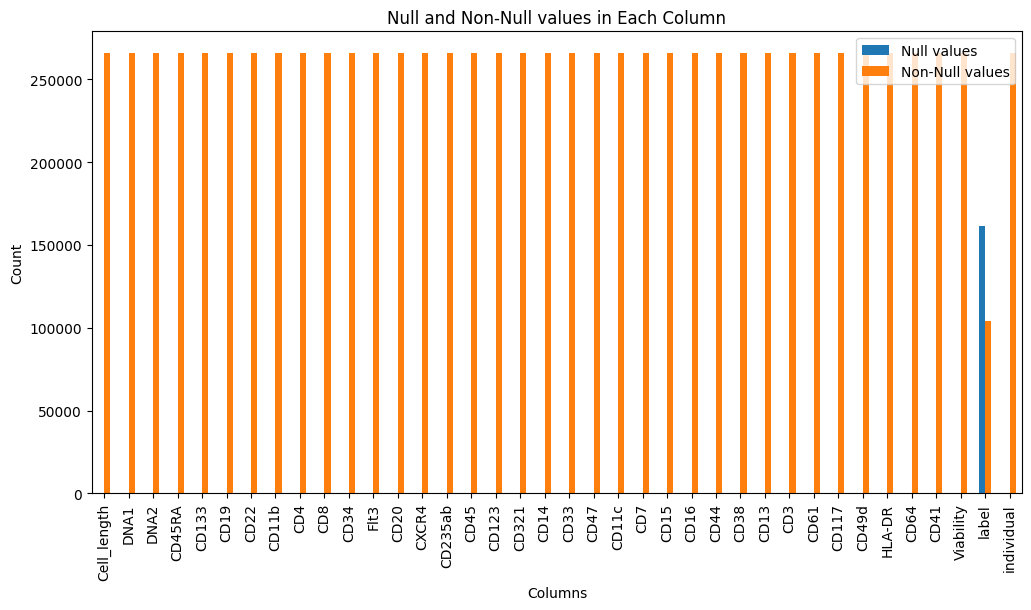

In [ ]:
#plot comparision of null values vs non-null values
null_counts=df.isnull().sum()
non_null_counts=df.notnull().sum()
plot_df=pd.DataFrame({"Null values": null_counts,
                        "Non-Null values": non_null_counts
                       })
plot_df.plot(kind="bar", figsize=(12, 6))
plt.title("Null and Non-Null values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

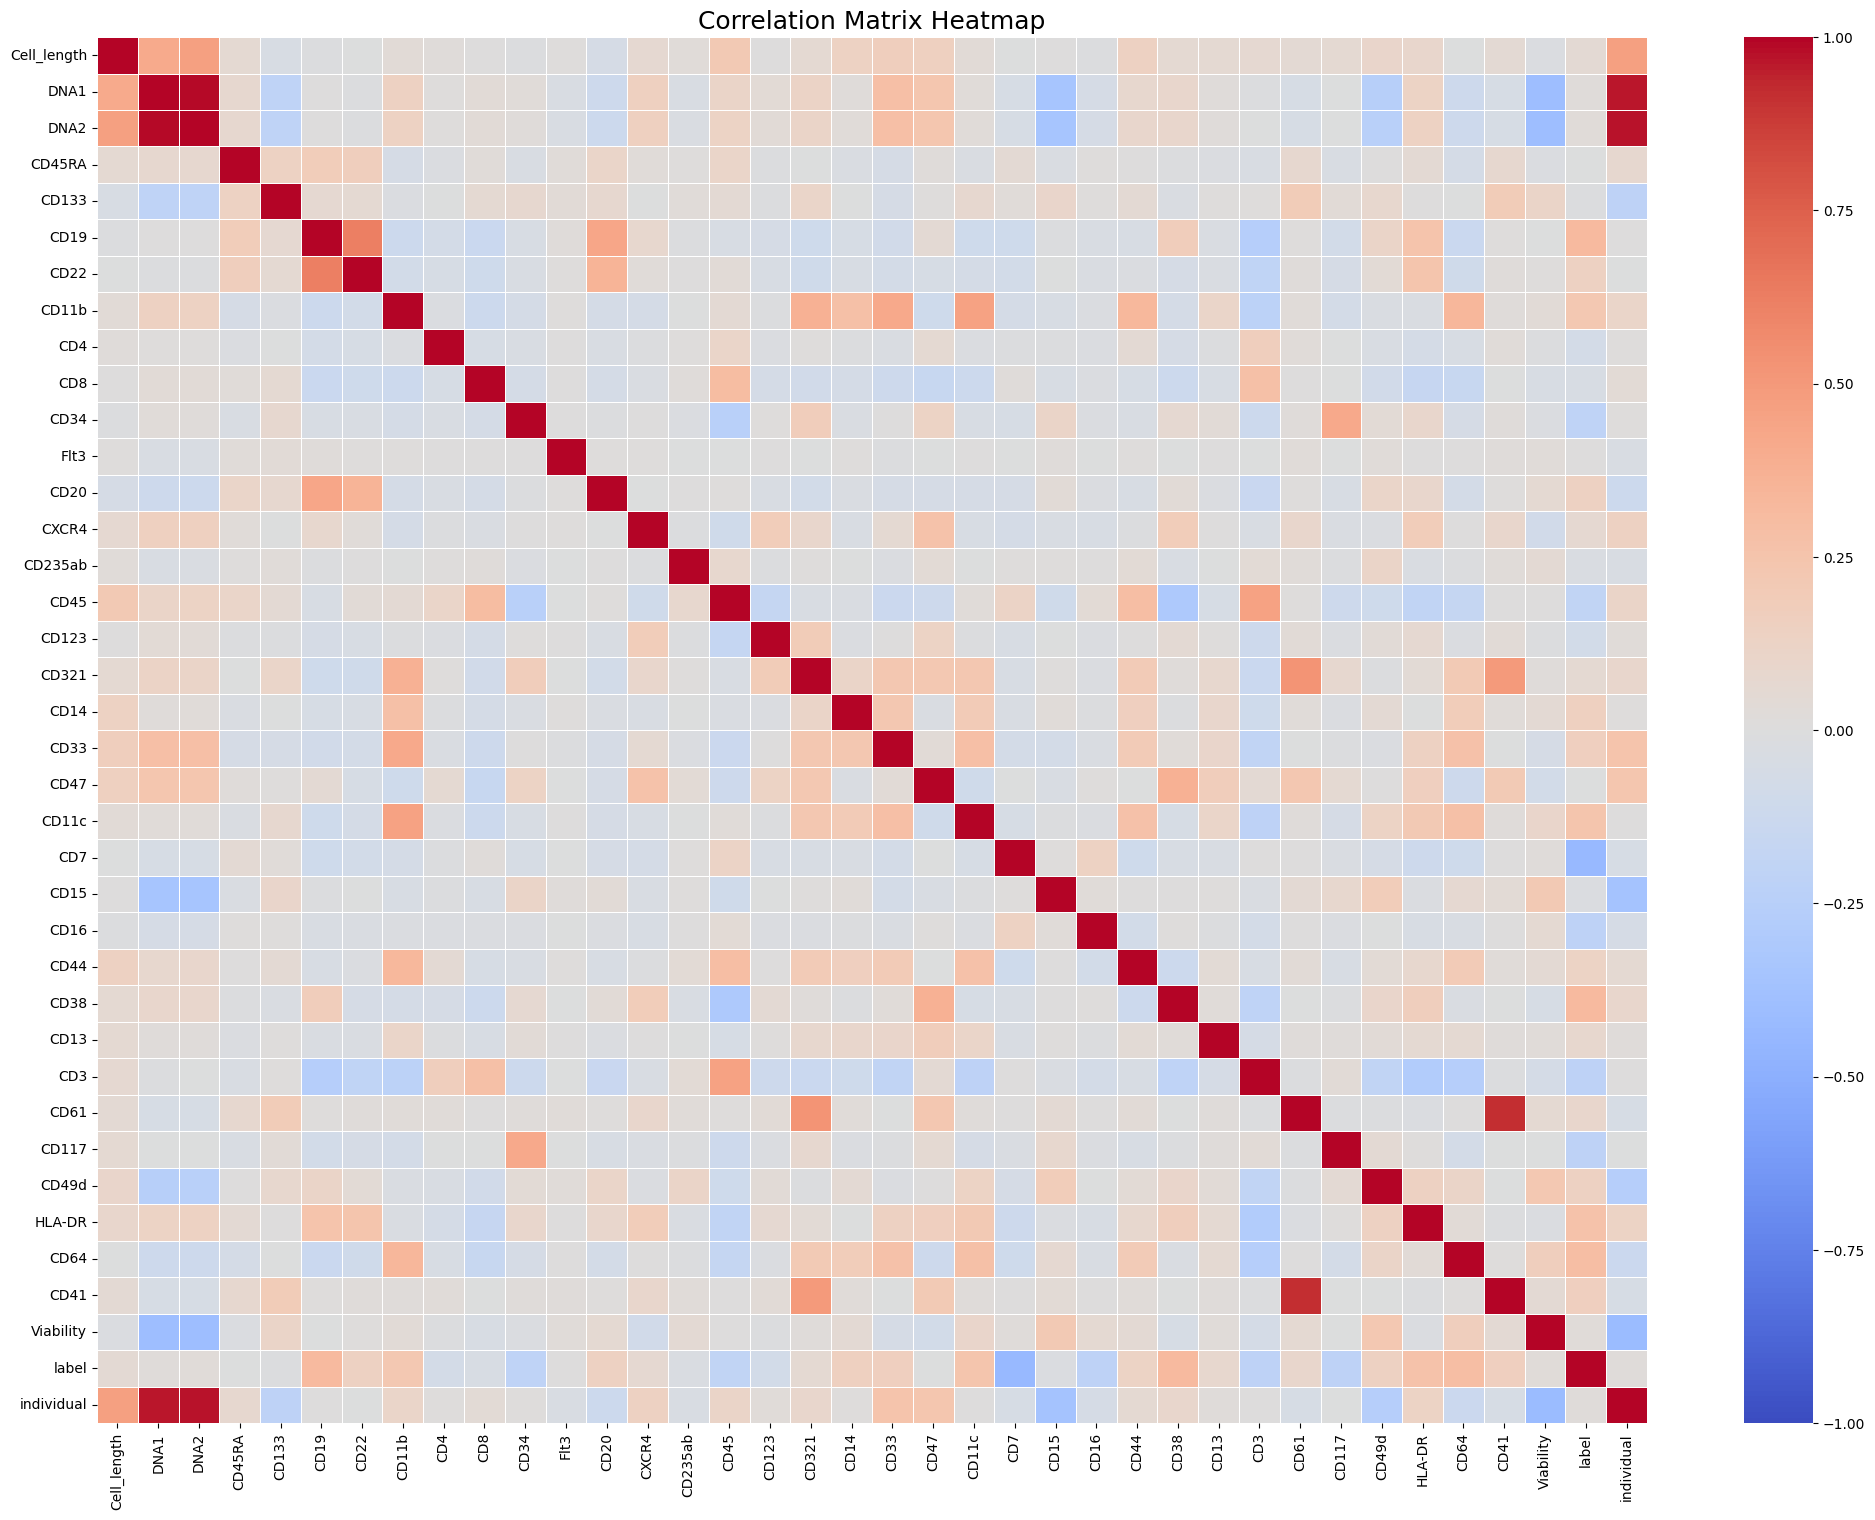

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
correlation_matrix = df.corr()
# Display the correlation matrix
correlation_matrix.round(2)
# Set the figure size
plt.figure(figsize=(25, 18))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot= False , cmap='coolwarm',vmin=-1,vmax=1, linewidths=0.5)
# Add a title
plt.title('Correlation Matrix Heatmap', fontsize=18)
# Show the plot
plt.show()


In [ ]:
#Range of Each Feature in data set
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame to store max, min, and range values
summary_df = pd.DataFrame({
    'Max': df[numerical_columns].max(),
    'Min': df[numerical_columns].min(),
    'Range': df[numerical_columns].max() - df[numerical_columns].min()
})

# Display the summary DataFrame
print("Summary of Max, Min, and Range for Each Numerical Column:")
print(summary_df)


Summary of Max, Min, and Range for Each Numerical Column:
                     Max        Min        Range
Cell_length    65.000000  10.000000    55.000000
DNA1         2745.666504  40.405746  2705.260757
DNA2         4396.652344  23.133020  4373.519323
CD45RA       2013.210327  -0.286683  2013.497010
CD133         628.772461  -0.290567   629.063028
CD19          367.355286  -0.290608   367.645893
CD22          435.604523  -0.286868   435.891391
CD11b         481.570679  -0.291343   481.862022
CD4          1804.521118  -0.288916  1804.810034
CD8           273.117188  -0.290179   273.407366
CD34          430.201294  -0.290203   430.491497
Flt3         3082.859619  -0.289583  3083.149203
CD20         1061.773926  -0.290826  1062.064752
CXCR4         744.679260  -0.285367   744.964627
CD235ab      1925.590210  -0.288219  1925.878429
CD45         3478.533936  18.906206  3459.627729
CD123        1913.932373  -0.290179  1914.222552
CD321        2401.089355  -0.267886  2401.357241
CD14       

In [ ]:
#class label distribution of data set
label_distribution = df['label'].value_counts()

print("Class Label Distribution:")
print(label_distribution)

Class Label Distribution:
label
7.0     26366
10.0    21099
8.0     20108
9.0     16520
13.0     6135
2.0      3905
4.0      3295
3.0      2248
11.0     1238
1.0      1207
6.0       916
14.0      513
12.0      330
5.0       304
Name: count, dtype: int64


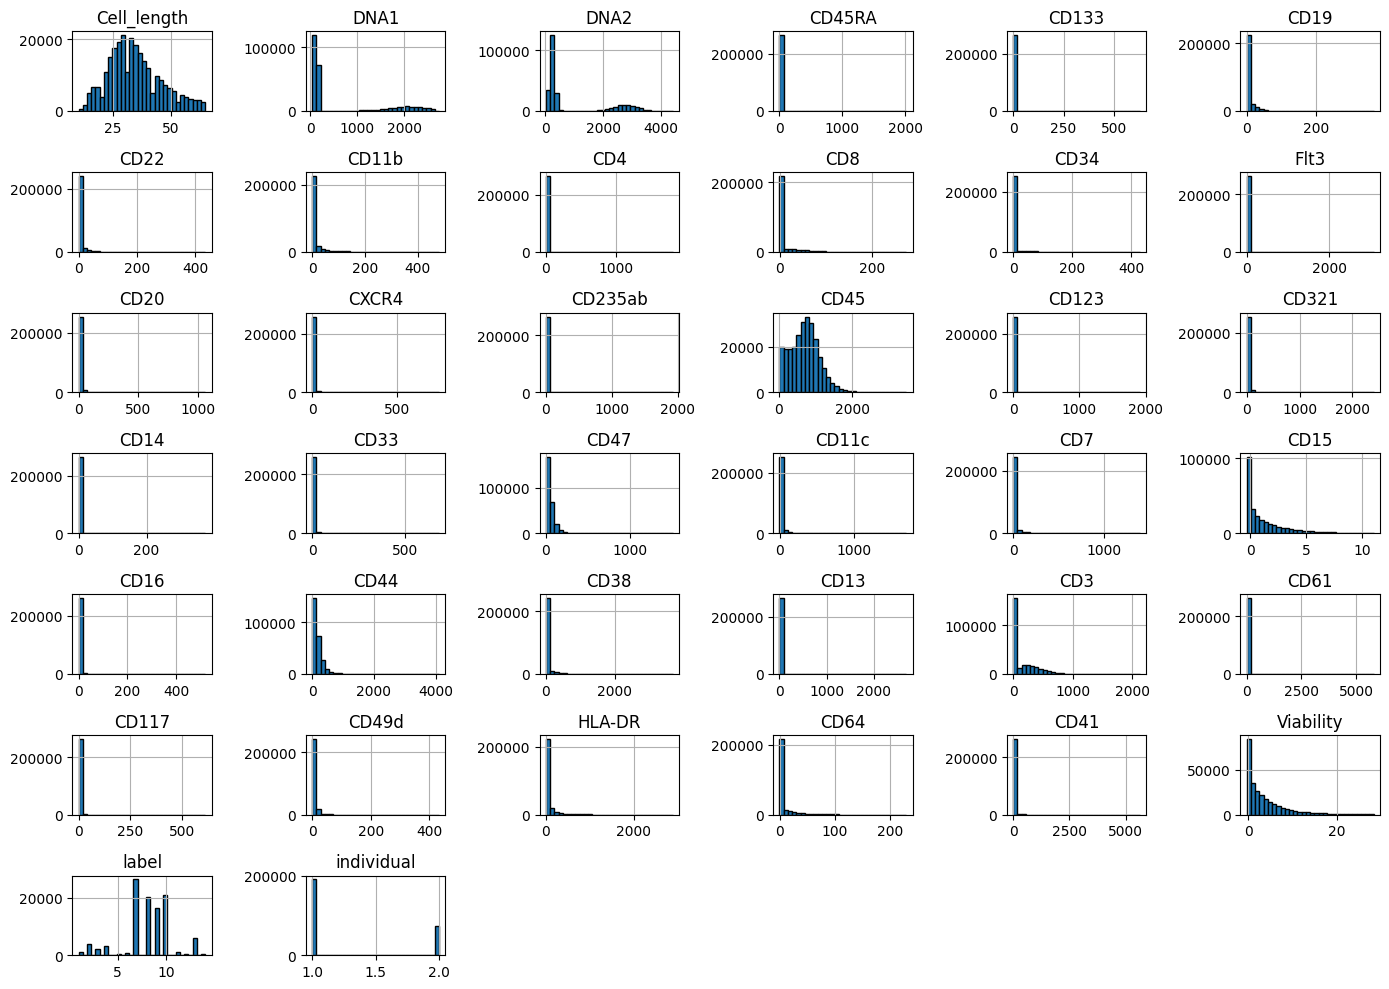

In [ ]:
#histrogram
df.hist(figsize=(14,10),bins=30,edgecolor='black')
plt.tight_layout()
plt.show()

(0.0, 6.0)

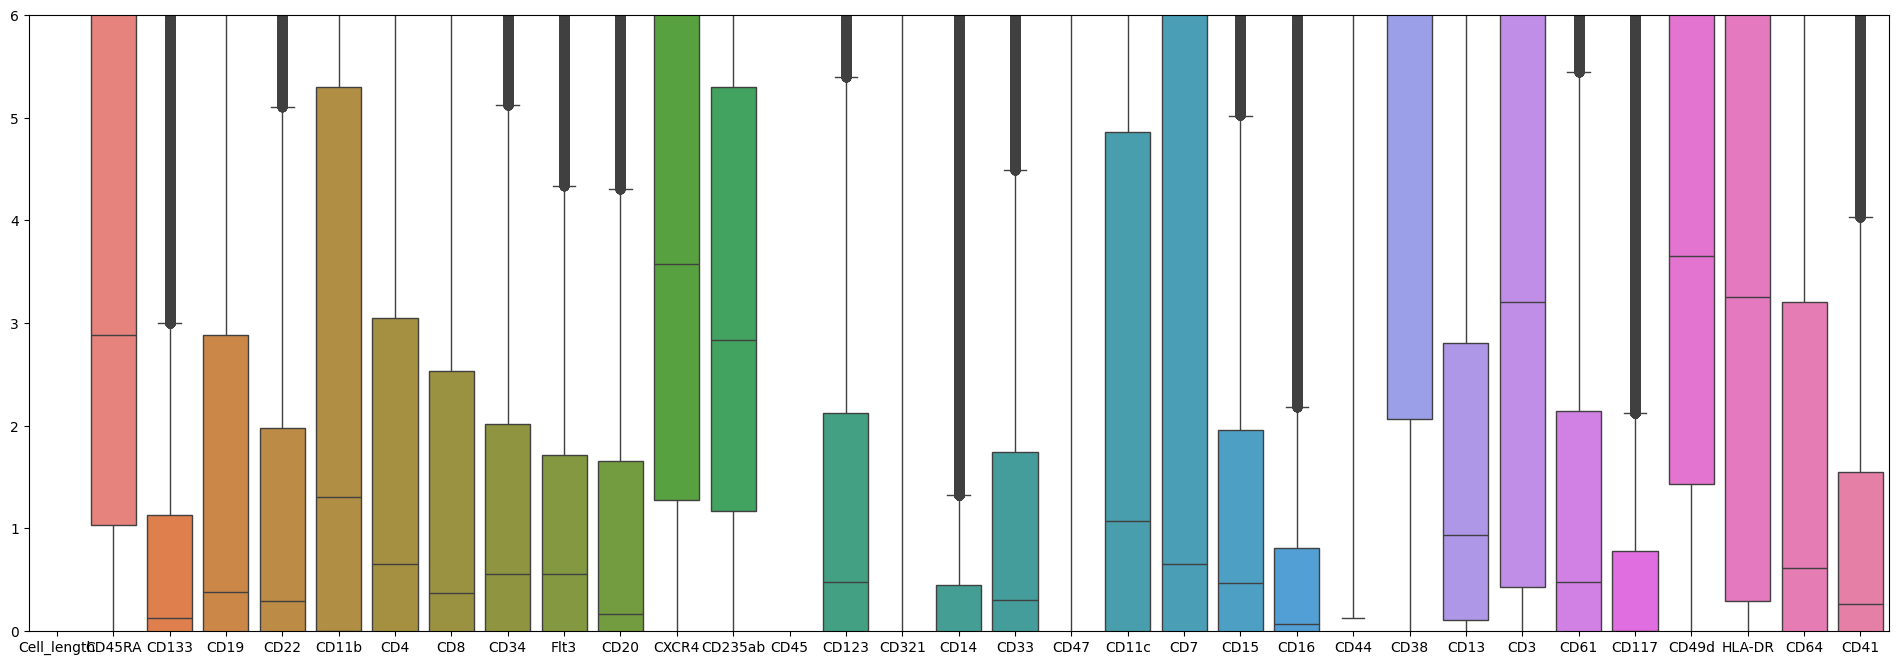

In [ ]:
#box plot
fig, ax = plt.subplots(figsize=(24, 8))
sns.boxplot(data=df[['Cell_length','CD45RA','CD133','CD19','CD22','CD11b','CD4','CD8','CD34','Flt3','CD20','CXCR4','CD235ab','CD45','CD123','CD321','CD14','CD33','CD47','CD11c','CD7','CD15','CD16','CD44','CD38','CD13','CD3','CD61','CD117','CD49d','HLA-DR','CD64','CD41']],ax=ax)
ax.set_ylim(0,6)

#**KURTOSIS**

                  Column      Kurtosis                   Category
Cell_length  Cell_length      2.834033  Platykurtic (light tails)
DNA1                DNA1      2.534998  Platykurtic (light tails)
DNA2                DNA2      2.427060  Platykurtic (light tails)
CD45RA            CD45RA   8914.445042  Leptokurtic (heavy tails)
CD133              CD133  39762.277510  Leptokurtic (heavy tails)
CD19                CD19     33.044641  Leptokurtic (heavy tails)
CD22                CD22     76.673855  Leptokurtic (heavy tails)
CD11b              CD11b     41.254044  Leptokurtic (heavy tails)
CD4                  CD4  17443.057242  Leptokurtic (heavy tails)
CD8                  CD8     16.299477  Leptokurtic (heavy tails)
CD34                CD34     95.275706  Leptokurtic (heavy tails)
Flt3                Flt3    862.869549  Leptokurtic (heavy tails)
CD20                CD20    206.215616  Leptokurtic (heavy tails)
CXCR4              CXCR4    577.158590  Leptokurtic (heavy tails)
CD235ab   

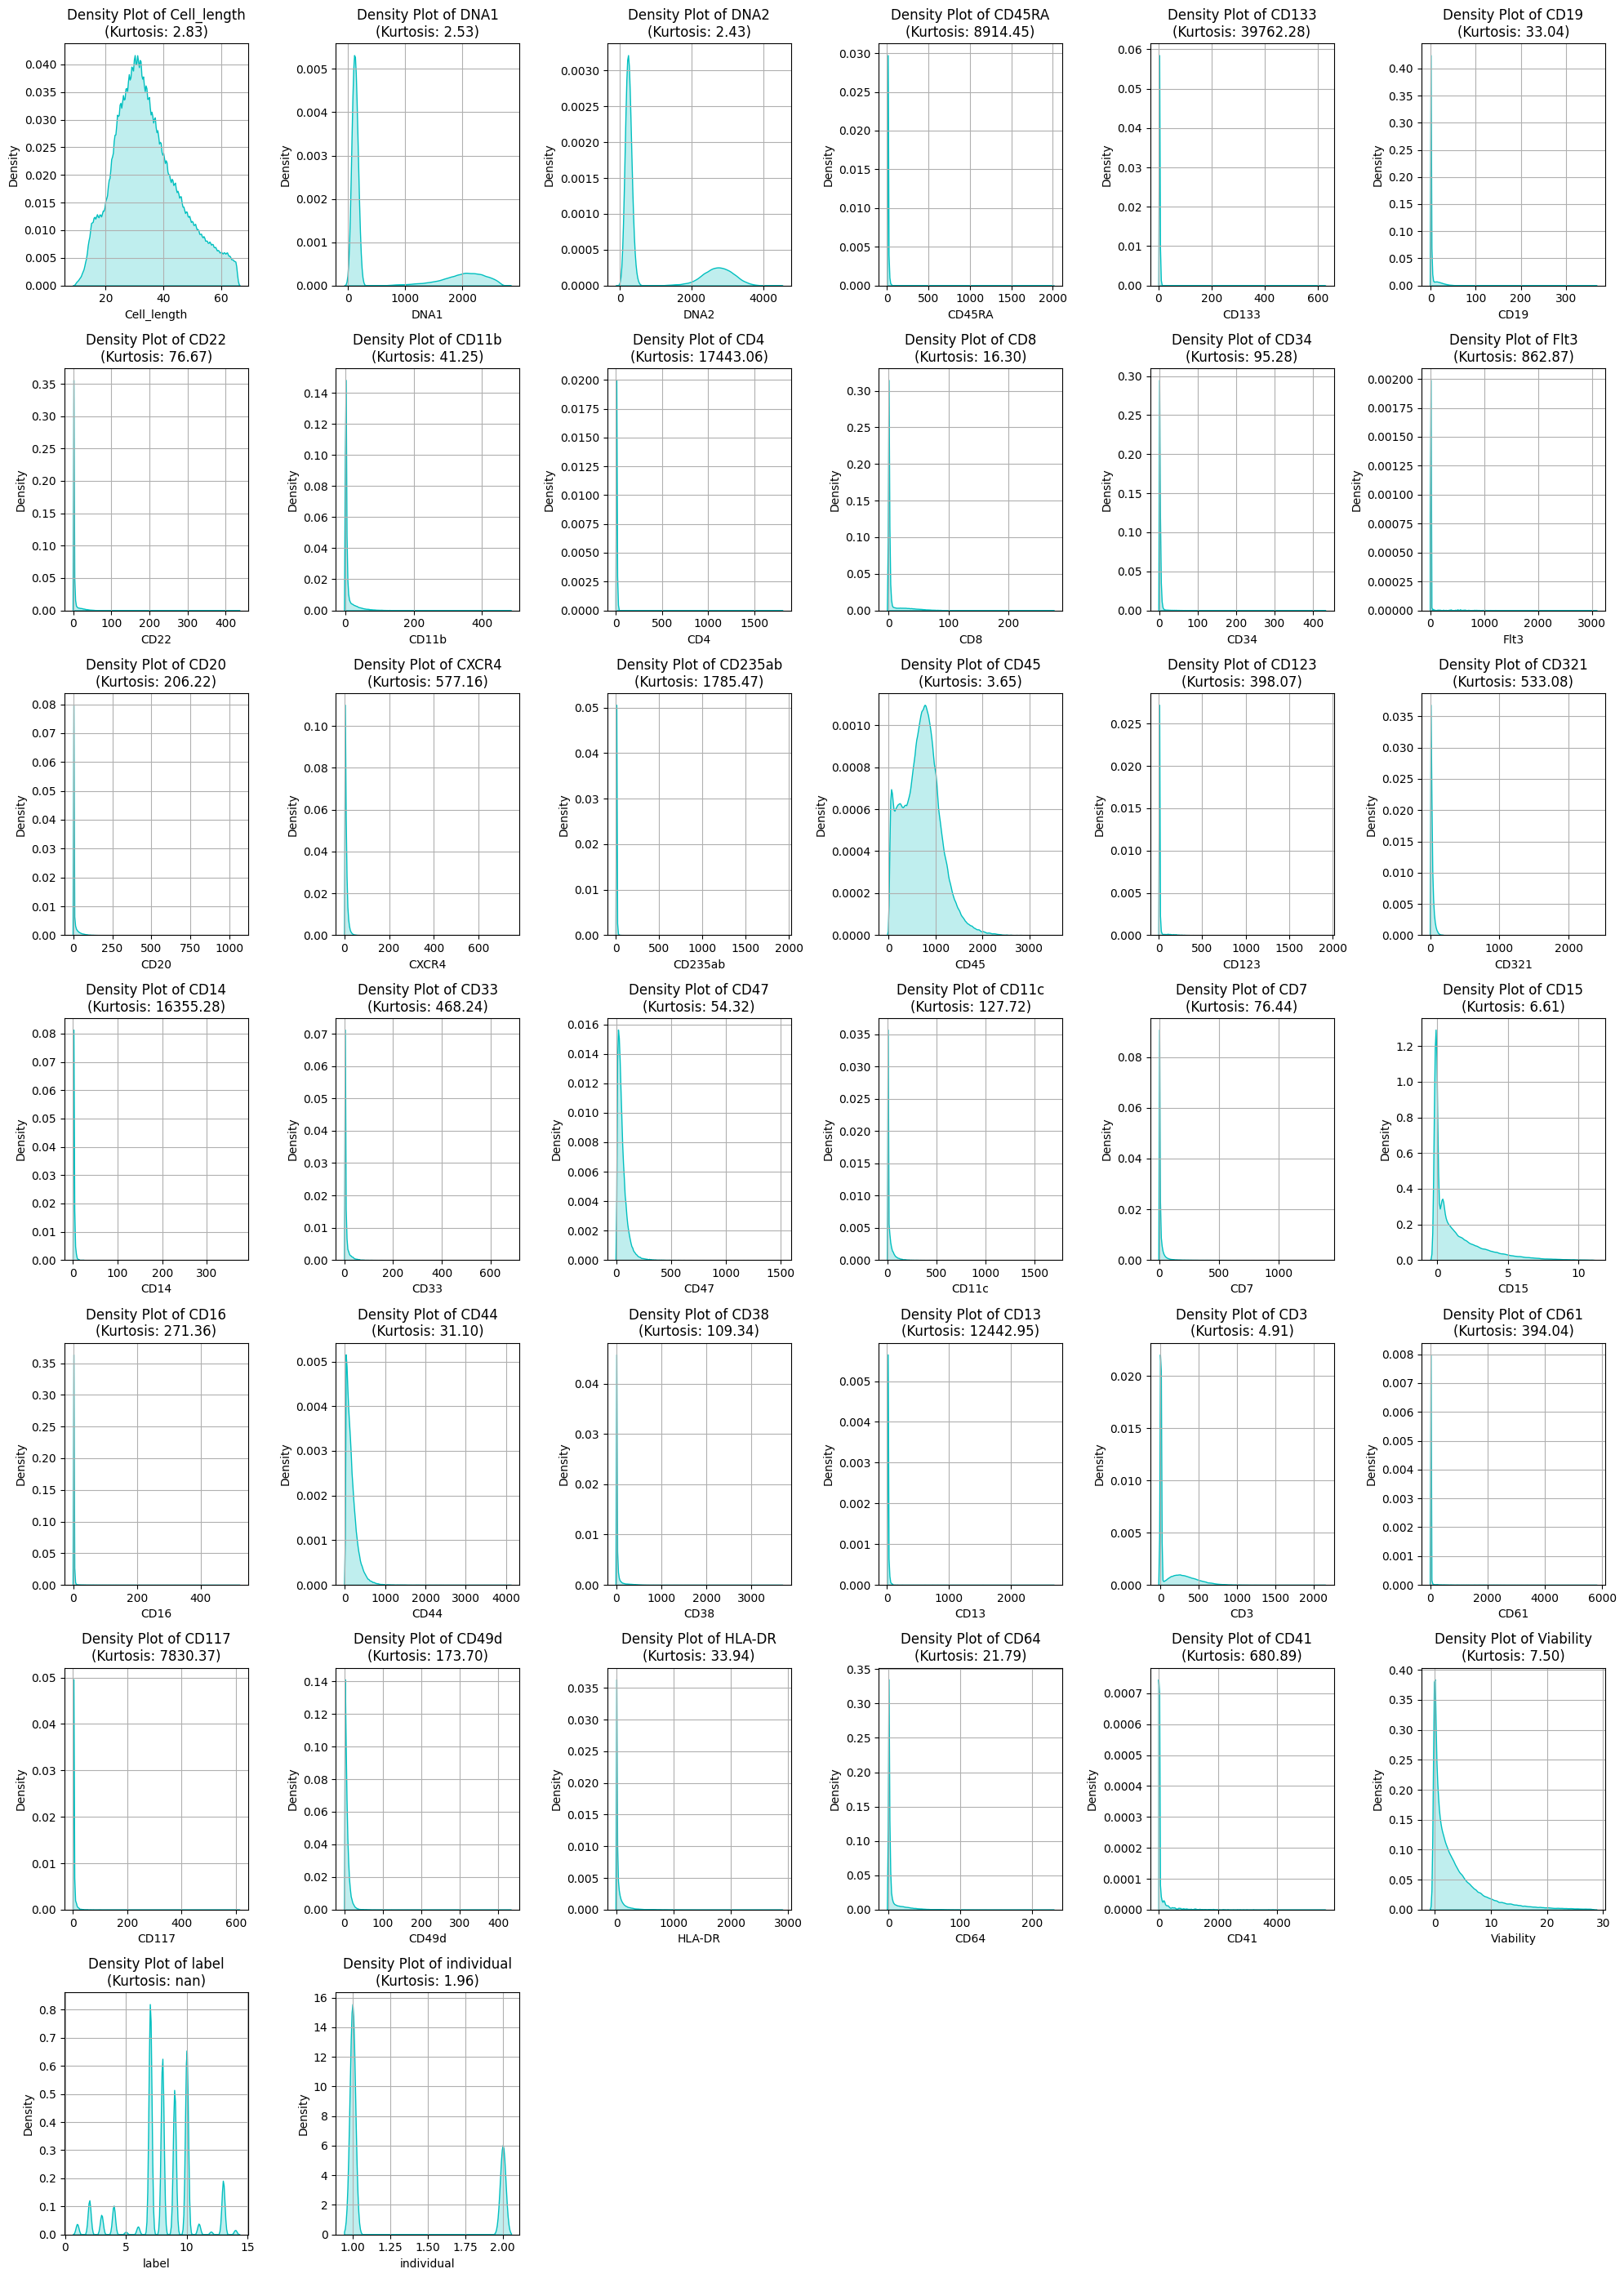

In [ ]:
#kurtosis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Calculate kurtosis for each column
kurtosis_values = df.apply(kurtosis, fisher=False)  # Pearson kurtosis (normal = 3)

# Create a DataFrame with kurtosis values
kurtosis_df = pd.DataFrame({'Column': df.columns, 'Kurtosis': kurtosis_values})

# Categorize the kurtosis values (Leptokurtic, Mesokurtic, Platykurtic)
def categorize_kurtosis(value):
    if value > 3:
        return 'Leptokurtic (heavy tails)'
    elif value < 3:
        return 'Platykurtic (light tails)'
    else:
        return 'Mesokurtic (normal tails)'

kurtosis_df['Category'] = kurtosis_df['Kurtosis'].apply(categorize_kurtosis)

# Print the kurtosis values and their categories
print(kurtosis_df)

# Number of numerical columns
num_cols = len(df.columns)

# Create a grid of 6 plots per row
cols_per_row = 6
rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 4))
axes = axes.flatten()  # Flatten the axes array to make iteration easier

# Plot density for each column
for i, column in enumerate(df.columns):
    sns.kdeplot(df[column].dropna(), color='c', fill=True, bw_adjust=0.5, ax=axes[i])  # Adjust bandwidth for smoothness
    axes[i].set_title(f'Density Plot of {column}\n(Kurtosis: {kurtosis_df.loc[kurtosis_df["Column"] == column, "Kurtosis"].values[0]:.2f})')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


#**SKEWNESS**

               Skewness                   Category
Cell_length    0.527832               Right-skewed
DNA1           1.155424               Right-skewed
DNA2           1.108669               Right-skewed
CD45RA        65.251655               Right-skewed
CD133        126.096395               Right-skewed
CD19           4.007221               Right-skewed
CD22           6.131244               Right-skewed
CD11b          5.264678               Right-skewed
CD4          114.022325               Right-skewed
CD8            3.313920               Right-skewed
CD34           8.397363               Right-skewed
Flt3          26.230625               Right-skewed
CD20          10.655454               Right-skewed
CXCR4         14.332247               Right-skewed
CD235ab       35.288190               Right-skewed
CD45           0.514492               Right-skewed
CD123         13.956222               Right-skewed
CD321         15.415273               Right-skewed
CD14          74.327532        

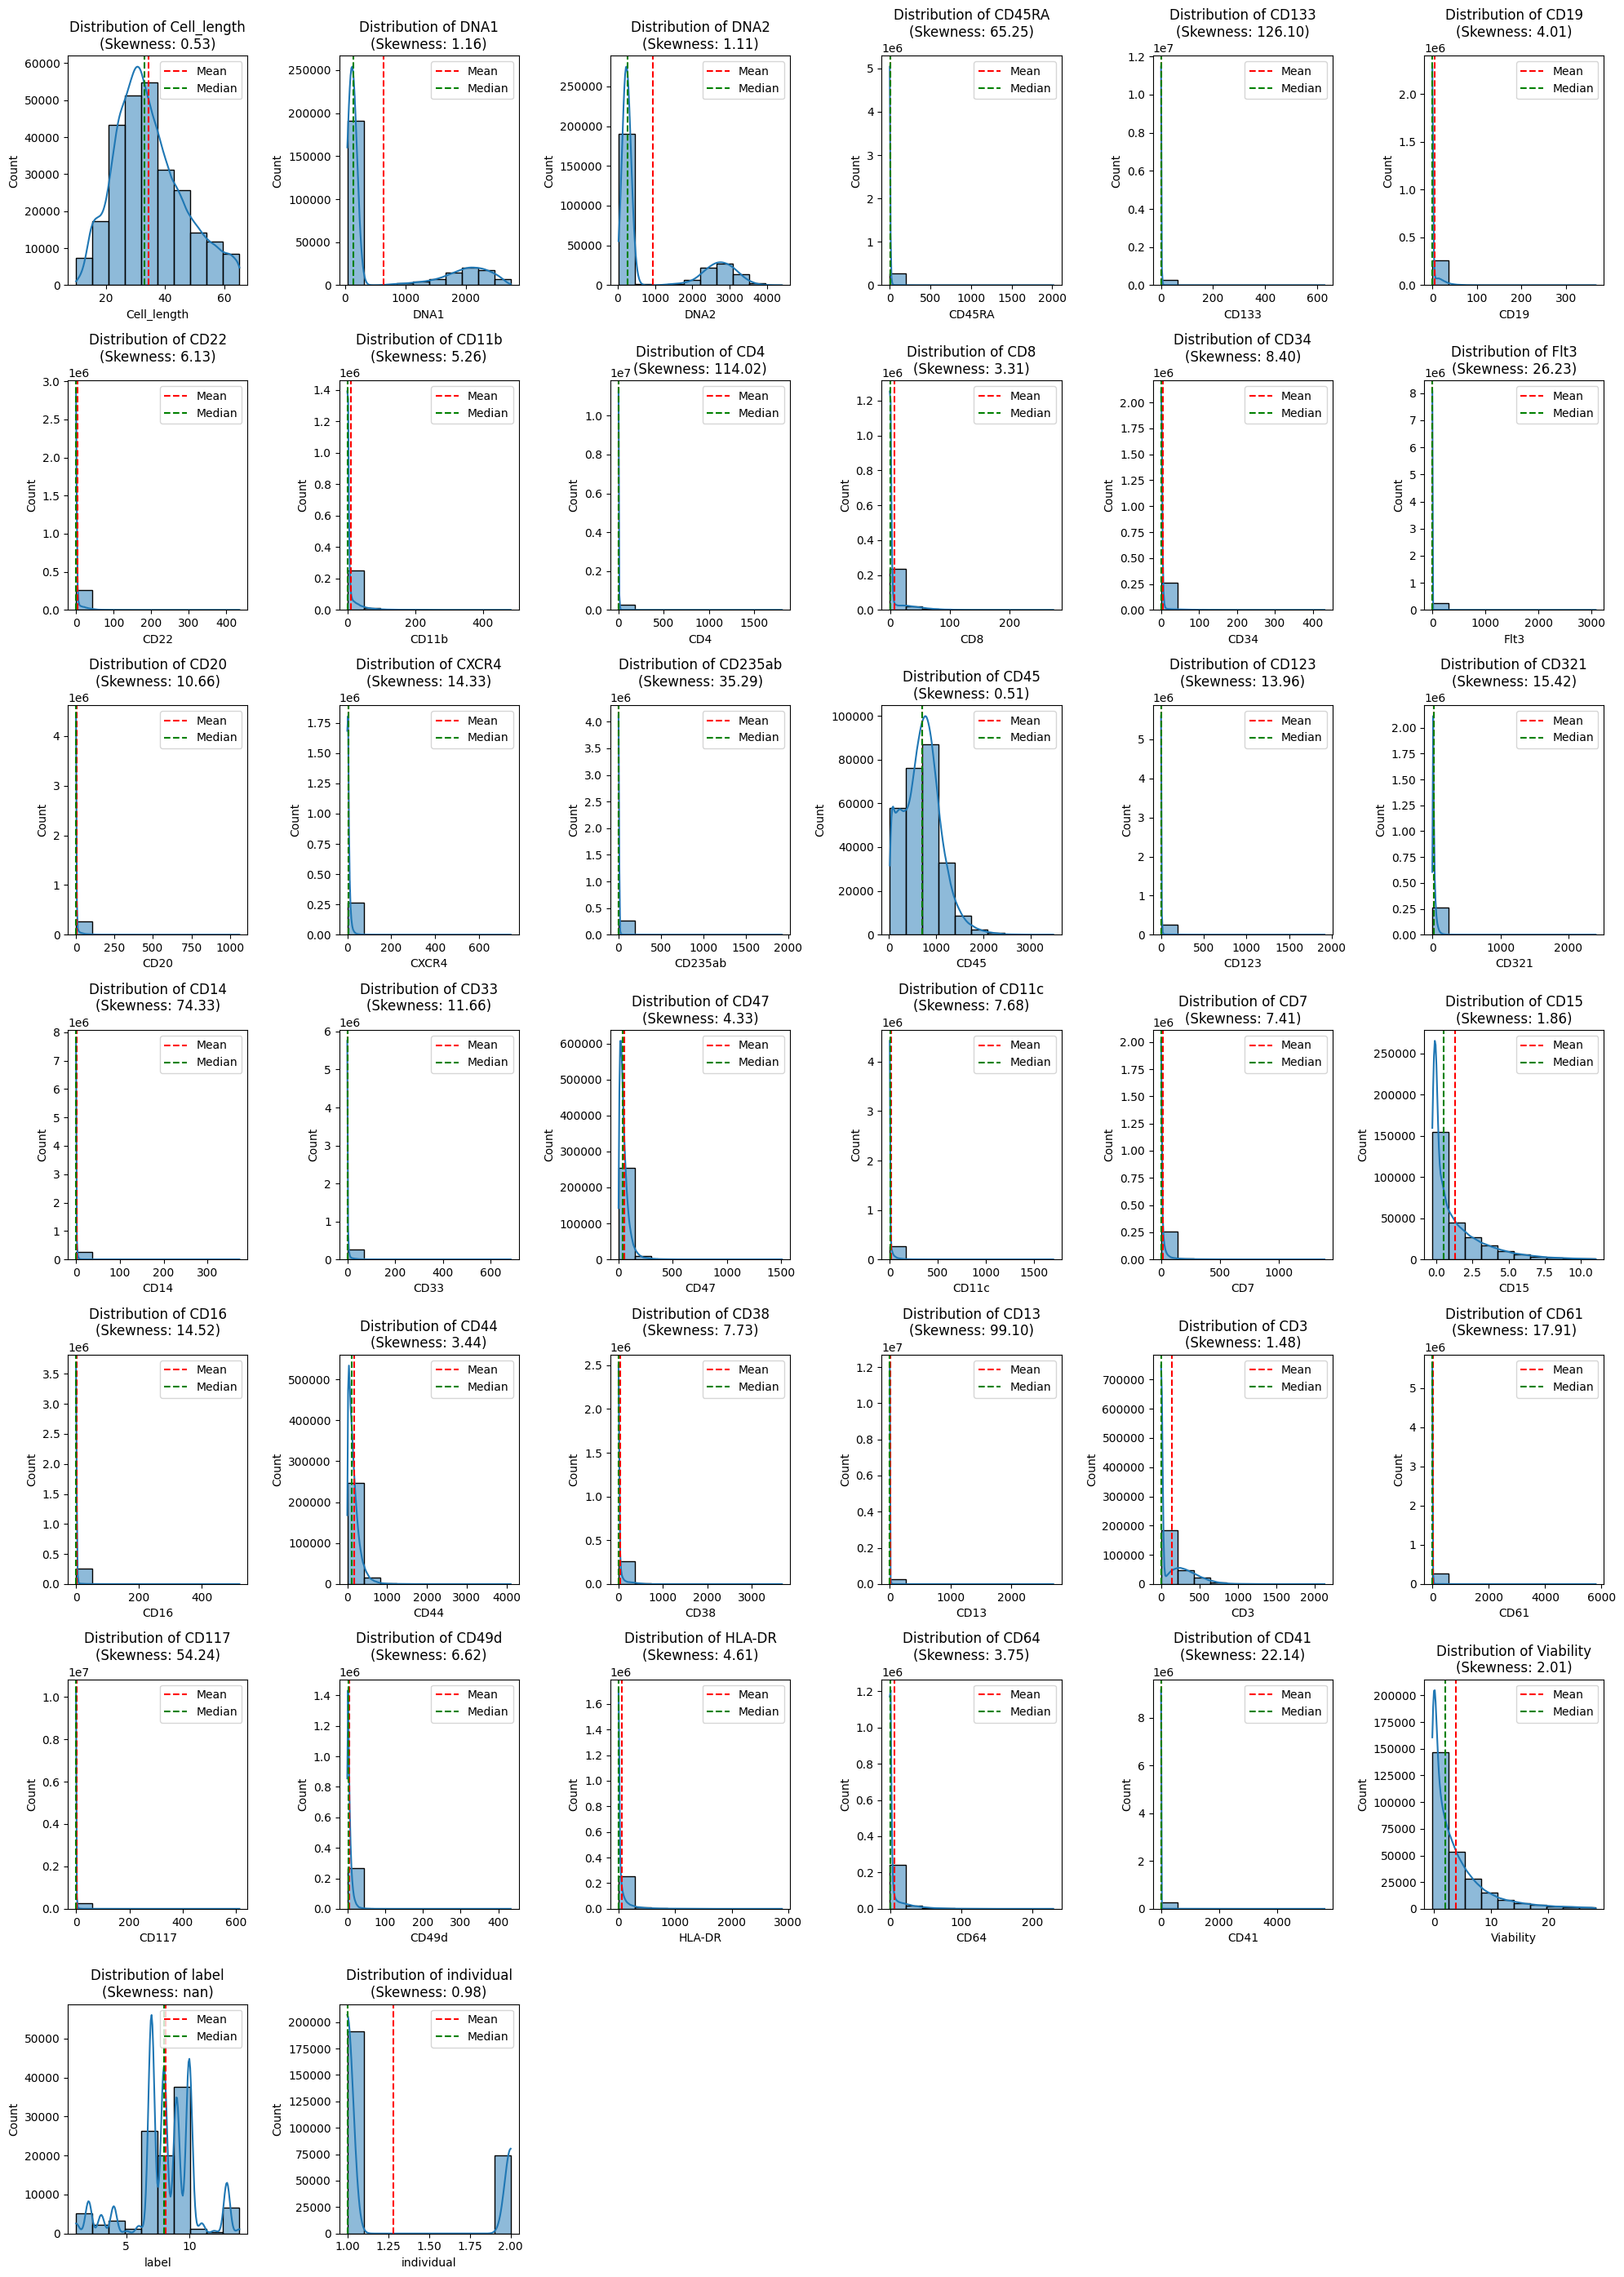

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import pandas as pd

skewness = df.apply(skew)

# Function to categorize skewness
def categorize_skewness(value):
    if value > 0.5:
        return 'Right-skewed'
    elif value < -0.5:
        return 'Left-skewed'
    else:
        return 'Approximately symmetrical'

# Apply the categorization
skewness_category = skewness.apply(categorize_skewness)

# Display skewness and its categorization
skewness_df = pd.DataFrame({'Skewness': skewness, 'Category': skewness_category})
print(skewness_df)

# Number of numerical columns
num_cols = len(df.columns)

# Create a grid of 6 plots per row
cols_per_row = 6
rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 4))
axes = axes.flatten()  # Flatten to make it easier to iterate through

# Plot histograms for each numerical column
for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}\n(Skewness: {skewness[col]:.2f})')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', label='Median')
    axes[i].legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


#**PAIR PLOT**

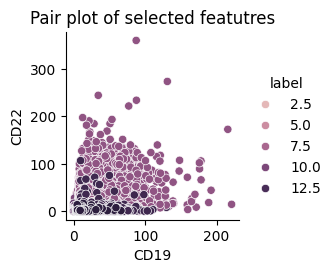

In [ ]:
#pairplot
import seaborn as sns
sns.pairplot(df,hue='label',x_vars=['CD19'],y_vars=['CD22'])
plt.title('Pair plot of selected featutres')
plt.show()

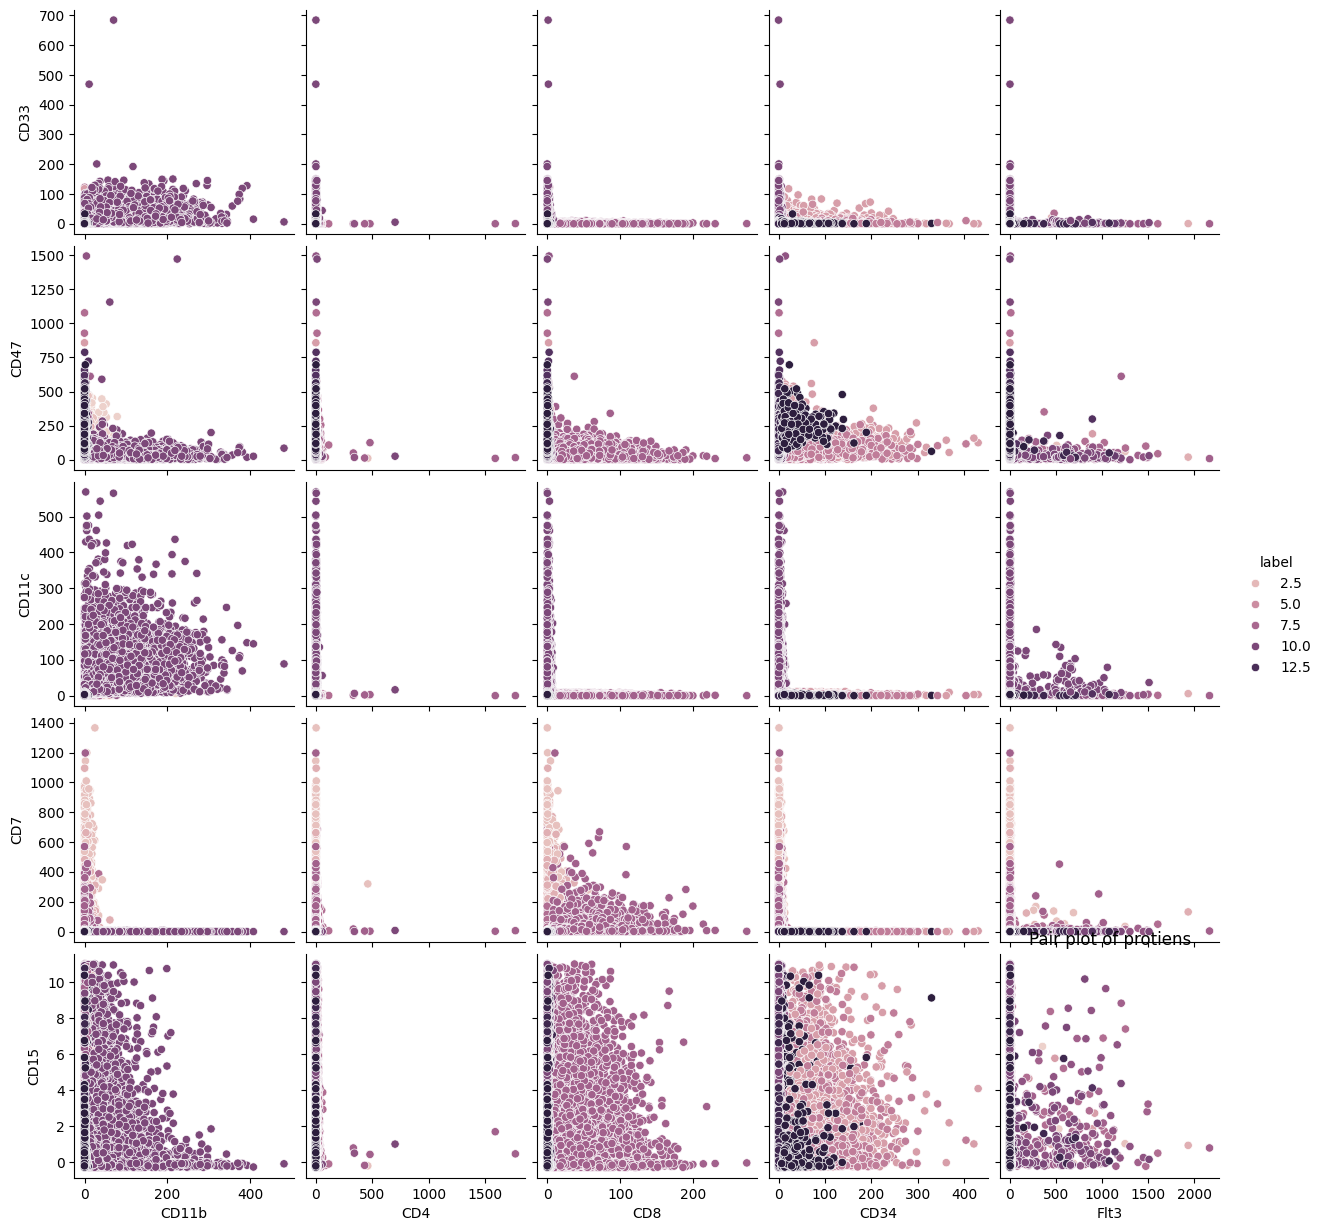

In [ ]:
sns.pairplot(df,hue='label',x_vars=['CD11b','CD4','CD8','CD34','Flt3'],y_vars=['CD33','CD47','CD11c','CD7','CD15'])
plt.title('Pair plot of protiens')
plt.show()

#**DIMENSIONALITY REDUCTION TECHNIQUES**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


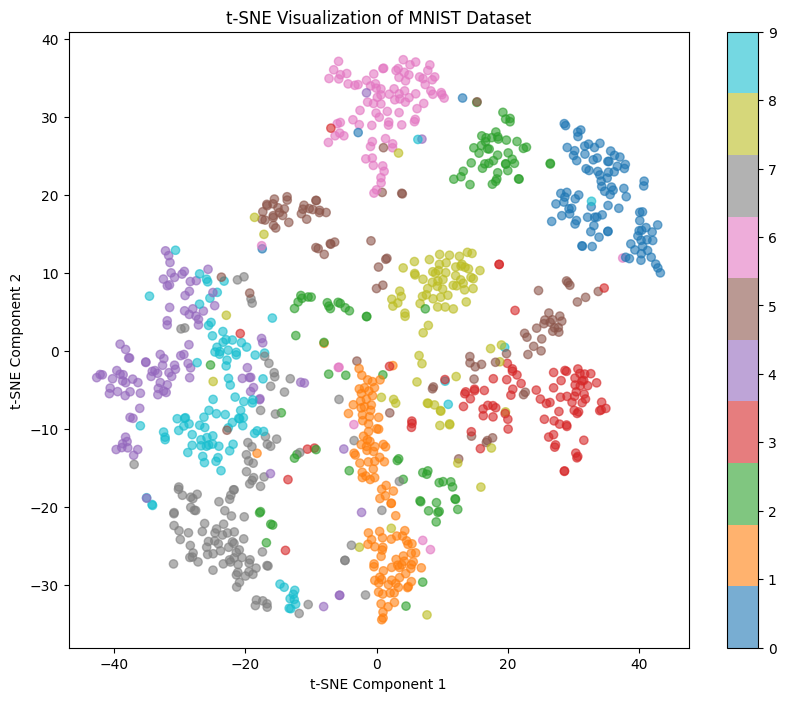

In [ ]:
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Select a subset of samples
n_samples = 1000
train_images_flat = train_images[:n_samples].reshape(n_samples, -1)  # Flatten the images
train_labels_subset = train_labels[:n_samples]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Adjust perplexity as needed
train_images_tsne = tsne.fit_transform(train_images_flat)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels_subset, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of MNIST Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

#**2D PCA**

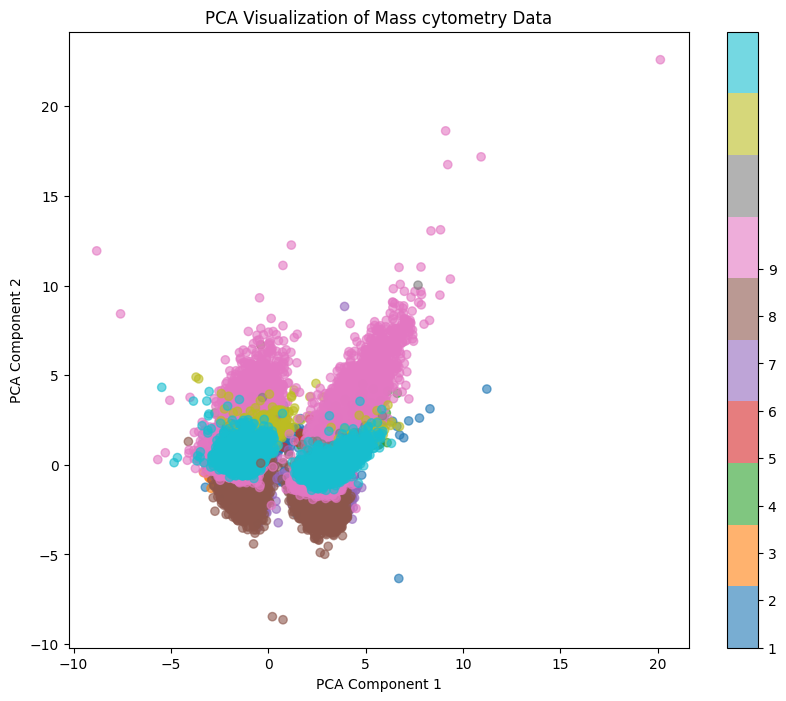

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(['label'], axis=1).dropna())

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Adding PCA results to the original dataframe
df['PCA1'] = pca_results[:, 0]
df['PCA2'] = pca_results[:, 1]

# Plotting the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['label'], cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('PCA Visualization of Mass cytometry Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

#**3D PCA**

Standard deviation: [515.38917334 515.38917334 515.38917334 515.38917334]
Proportion of Variance: [0.13024851 0.10495842 0.0679645  0.06160901]
Cumulative Proportion: [0.13024851 0.23520693 0.30317142 0.36478043]


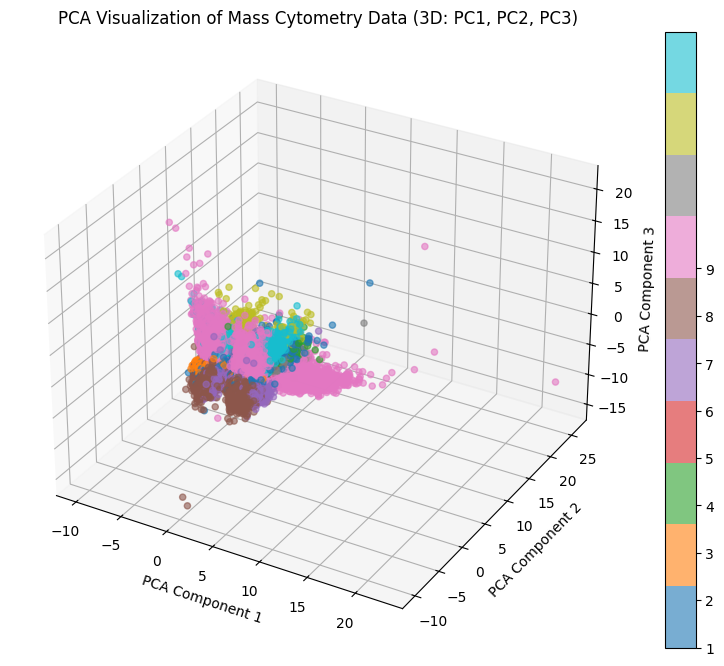

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(['label'], axis=1).dropna())

# Apply PCA with 4 components
pca = PCA(n_components=4)
pca_results = pca.fit_transform(scaled_data)

# Adding PCA results to the original dataframe
df['PCA1'] = pca_results[:, 0]
df['PCA2'] = pca_results[:, 1]
df['PCA3'] = pca_results[:, 2]
df['PCA4'] = pca_results[:, 3]

# Print the PCA results (Standard deviation, Proportion of variance, and Cumulative Proportion)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
standard_deviation = pca.singular_values_ / np.sqrt(pca.explained_variance_)

print(f"Standard deviation: {standard_deviation}")
print(f"Proportion of Variance: {explained_variance}")
print(f"Cumulative Proportion: {cumulative_variance}")

# Plotting the PCA results in 3D (PC1, PC2, PC3)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['label'], cmap='tab10', alpha=0.6)

# Add labels and title
ax.set_title('PCA Visualization of Mass Cytometry Data (3D: PC1, PC2, PC3)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Adding color bar
plt.colorbar(scatter, ticks=range(10))

plt.show()

#**BINARY MASKING**

In [ ]:
#binary masking of a data frame
import numpy as np
import pandas as pd

# Define the data
data = {
    "column1":[5,11,18,8],
    "column2":[10,40,15,30],
    "column3": [9,25,35,20]
}

# Create DataFrame
d = pd.DataFrame(data)

# Probability of including each value
p_m = 0.5

# Generate the binary mask (1 for inclusion, 0 for exclusion)
mask = np.random.binomial(1, p_m, d.shape)

# Apply mask to DataFrame
masked_d = d * mask

print("Original DataFrame:\n", d)
print("\nBinary Mask:\n", mask)
print("\nMasked DataFrame:\n", masked_d)


Original DataFrame:
    column1  column2  column3
0        5       10        9
1       11       40       25
2       18       15       35
3        8       30       20

Binary Mask:
 [[1 1 0]
 [0 1 1]
 [1 1 1]
 [1 1 0]]

Masked DataFrame:
    column1  column2  column3
0        5       10        0
1        0       40       25
2       18       15       35
3        8       30        0


#**CORRUPTION OF DATA**

In [ ]:
import numpy as np
import pandas as pd

def create_corrupted_data(data, keep_probability=0.4):
    print("Original Data (x):\n", data)

    m = np.random.binomial(1, keep_probability, size=data.shape)
    print("\nBinary Mask (m):\n", m)

    num_rows = data.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    x_shuffled = data.iloc[shuffled_rows].reset_index(drop=True)
    print("\nShuffled Data (x_shuffled):\n", x_shuffled)


    x_corrupted = data * (1 - m) + x_shuffled * m
    print("\nCorrupted Data (x_corrupted):\n", x_corrupted)

    return x_corrupted

# Sample data
data = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [6, 7, 8, 9, 10],
    'C': [11, 12, 13, 14, 15],
    'D': [16, 17, 18, 19, 20]
})

# Call the function
corrupted_data = create_corrupted_data(data, keep_probability=0.6)


Original Data (x):
    A   B   C   D
0  1   6  11  16
1  2   7  12  17
2  3   8  13  18
3  4   9  14  19
4  5  10  15  20

Binary Mask (m):
 [[1 1 1 1]
 [1 1 0 0]
 [0 0 0 1]
 [1 0 1 1]
 [1 0 0 1]]

Shuffled Data (x_shuffled):
    A   B   C   D
0  2   7  12  17
1  5  10  15  20
2  1   6  11  16
3  3   8  13  18
4  4   9  14  19

Corrupted Data (x_corrupted):
    A   B   C   D
0  2   7  12  17
1  5  10  12  17
2  3   8  13  16
3  3   9  13  18
4  4  10  15  19


In [ ]:
corrupted_data = create_corrupted_data(df, keep_probability=0.4)

corrupted_data.head()

Original Data (x):
    column1  column2  column3
0        5       10        9
1       11       40       25
2       18       15       35
3        8       30       20

Binary Mask (m):
 [[1 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 1]]

Shuffled Data (x_shuffled):
    column1  column2  column3
0        5       10        9
1       18       15       35
2        8       30       20
3       11       40       25

Corrupted Data (x_corrupted):
    column1  column2  column3
0        5       10        9
1       18       40       25
2       18       15       35
3        8       30       25


column1  column2  column3
0        5       10        9
1       18       40       25
2       18       15       35
3        8       30       25

In [ ]:
keep_probability=0.4
df_corrupted = np.random.binomial(1, keep_probability, size=df.shape)
print("\nBinary Mask (m):\n", df_corrupted)
mask_new = 1*(df!=df_corrupted)
print("\n New Binary Mask (m):\n",mask_new)


Binary Mask (m):
 [[1 0 0]
 [1 0 0]
 [1 1 0]
 [0 1 0]]

 New Binary Mask (m):
    column1  column2  column3
0        1        1        1
1        1        1        1
2        1        1        1
3        1        1        1


#**LABEL AND UNLABEL DATA**

In [ ]:
df.columns

Index(['Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22',
       'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab',
       'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7',
       'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d',
       'HLA-DR', 'CD64', 'CD41', 'Viability', 'label', 'individual'],
      dtype='object')

In [ ]:
df_labeled = df[df['label'].notna()]
df_unlabeled = df[df['label'].isna()]


x_labeled = df_labeled.drop(columns=['label'])
y_labeled = df_labeled['label']

x_unlabeled = df_unlabeled.drop(columns=['label'])
#y_unlabeled = df_unlabeled['label']


print("Labeled Features (x_labeled):\n", x_labeled)
print("\nUnlabeled Features (x_unlabeled):\n", x_unlabeled)
print("\nLabeled Target (y_labeled):\n", y_labeled)

#print("\nUnlabeled Target (y_unlabeled):\n", y_unlabeled)


Labeled Features (x_labeled):
         Cell_length         DNA1         DNA2    CD45RA     CD133       CD19  \
0                22   201.783295   253.016647  0.817049 -0.147947  -0.033482   
1                35   191.828598   308.869080  3.801385 -0.191446  -0.083274   
2                32   116.111923   200.839218  3.204439 -0.161106   0.369613   
3                29   176.248505   313.022461  2.237382 -0.138071  -0.088311   
4                25   133.332779   226.467758 -0.044047 -0.151509   0.402548   
...             ...          ...          ...       ...       ...        ...   
104179           58  2308.310303  3518.157471 -0.000532 -0.153228   9.874423   
104180           55  1997.182739  3237.193604  3.747007 -0.186719  12.390443   
104181           40  2509.493408  3193.563232 -0.184019 -0.072385  12.375916   
104182           48  2031.685425  3032.251953  1.568744  0.379171  10.129170   
104183           64  1764.721802  2972.677002  2.716329  0.487051   8.959737   

        

#**TRAINING DATA**

In [ ]:
from sklearn.model_selection import train_test_split

# Split labeled data into training (70%) and testing (30%) sets
x_train, x_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.3, random_state=42)

# Display the results

print("Training Features (x_train):\n", x_train.shape)
print("\nTraining Target (y_train):\n", y_train.shape)
print("\nTesting Features (x_test):\n", x_test.shape)
print("\nTesting Target (y_test):\n", y_test.shape)

print("Training Features (x_train):\n", x_train)
print("\nTraining Target (y_train):\n", y_train)
print("\nTesting Features (x_test):\n", x_test)
print("\nTesting Target (y_test):\n", y_test)



Training Features (x_train):
 (72928, 37)

Training Target (y_train):
 (72928,)

Testing Features (x_test):
 (31256, 37)

Testing Target (y_test):
 (31256,)
Training Features (x_train):
         Cell_length         DNA1         DNA2    CD45RA     CD133       CD19  \
64113            25   123.413055   247.264938  5.697453  1.537298   0.776895   
82744            31  1824.911621  2485.373047  2.224972 -0.264615  -0.188495   
24294            41    86.404358   217.855179  1.931000  1.104188   1.239756   
7820             38   185.181335   329.612823  1.003372  0.504241  -0.129074   
43295            26   160.022964   322.868805  4.651943  0.963454  18.185394   
...             ...          ...          ...       ...       ...        ...   
54886            15   147.025452   288.088531  2.226745  1.153808  -0.057169   
76820            33  1809.336670  2436.716309  3.425539 -0.220359  -0.068687   
103694           43  2071.823975  2972.875732  1.556306 -0.131712  19.577427   
860          

#**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

def logistic_with_loss(x_train, y_train, x_test, y_test):

    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)


    log_reg = LogisticRegression(random_state=42, max_iter=500)
    log_reg.fit(x_train_scaled, y_train)


    probabilities = log_reg.predict_proba(x_test_scaled)


    loss = log_loss(y_test, probabilities)

    return probabilities, loss


log_reg_probs, log_reg_loss = logistic_with_loss(x_train, y_train, x_test, y_test)


print("Logistic Regression Probabilities:\n", log_reg_probs)
print("\nLogistic Regression \n", log_reg_loss)


Logistic Regression Probabilities:
 [[5.77719299e-12 1.90267136e-13 3.98216381e-14 ... 2.12118903e-14
  4.02524029e-14 5.70334700e-13]
 [5.26831594e-28 3.40489939e-24 9.13518941e-23 ... 4.87345459e-13
  2.47698326e-04 7.21136211e-09]
 [4.43034825e-11 1.73201827e-10 1.07453038e-11 ... 1.30265220e-11
  1.15879568e-03 4.72548036e-08]
 ...
 [8.27627621e-12 2.05856883e-09 1.79065096e-08 ... 1.05019847e-16
  1.01992186e-13 1.04867296e-16]
 [1.92020897e-09 3.14214574e-05 1.06623968e-06 ... 1.01795519e-09
  1.08352946e-03 1.52553249e-05]
 [7.80677783e-07 9.31719997e-04 8.82172441e-06 ... 1.13225254e-11
  3.68083320e-04 2.30368373e-09]]

Logistic Regression 
 0.029897937868610187


#**XG BOOST**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

def xgboost_with_loss(x_train, y_train, x_test, y_test):

    y_train_adjusted = y_train - 1
    y_test_adjusted = y_test - 1


    xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)
    xgb_clf.fit(x_train, y_train_adjusted)


    probabilities = xgb_clf.predict_proba(x_test)
    loss = log_loss(y_test_adjusted, probabilities)

    return probabilities, loss

xgb_probs, xgb_log_loss = xgboost_with_loss(x_train, y_train, x_test, y_test)

# Displaying the results
print("\nXGBoost Probabilities:\n", xgb_probs)
print("\nXGBoost Log Loss:\n", xgb_log_loss)



XGBoost Probabilities:
 [[5.2870575e-07 5.5549259e-07 4.4547227e-07 ... 8.4330856e-07
  8.0272923e-07 6.2187780e-07]
 [8.2367842e-07 1.8141062e-06 6.8722528e-07 ... 1.0766731e-06
  1.7258326e-05 2.1068540e-06]
 [5.5205066e-07 8.6178414e-07 5.8480362e-07 ... 1.0324942e-06
  4.2642719e-06 9.2441218e-07]
 ...
 [6.5520271e-07 4.6091463e-06 9.3846472e-07 ... 5.8767739e-07
  5.1200971e-07 4.5345195e-07]
 [2.7839903e-06 3.2294638e-06 2.5266534e-06 ... 4.5210136e-06
  1.0395867e-05 3.4572942e-05]
 [8.4335568e-07 7.6935595e-07 6.7999758e-07 ... 6.8546416e-07
  3.8635189e-06 9.1242248e-07]]

XGBoost Log Loss:
 0.00394913549174777


#**ENCODER**

In [ ]:
import numpy as np
import pandas as pd

def binary_mask(p_m, x_unlabeled):

    mask = np.random.binomial(1, p_m, size=x_unlabeled.shape)
    return mask

def corruption(mask, x_unlabeled):

    num_rows = x_unlabeled.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    x_shuffled = x_unlabeled.iloc[shuffled_rows].reset_index(drop=True)


    x_corrupted = x_unlabeled * (1 - mask) + x_shuffled * mask
    return x_corrupted


In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np

def self_supervised(x_unlabeled, p_m, alpha, parameters):
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    dimension = x_unlabeled.shape[1]

    input_layer = Input(shape=(dimension,))

    # Hidden layer
    h = Dense(int(dimension), activation='relu')(input_layer)

    # Mask estimation output
    output1 = Dense(int(dimension), activation='sigmoid', name='mask_estimation')(h)

    # Feature estimation output
    output2 = Dense(int(dimension), activation='sigmoid', name='feature_estimation')(h)

    # Define the model
    model = Model(inputs=input_layer, outputs=[output1, output2])

    model.compile(
        optimizer='rmsprop',
        loss={'mask_estimation': 'binary_crossentropy', 'feature_estimation': 'mean_squared_error'},
        loss_weights={'mask_estimation': 1.0, 'feature_estimation': alpha}
    )

    # Ensure data is in the form of NumPy arrays
    x_unlabeled_np = x_unlabeled.to_numpy() if isinstance(x_unlabeled, pd.DataFrame) else x_unlabeled
    corruption_binary_mask = binary_mask(p_m, x_unlabeled_np)
    corrupted_data = corruption(corruption_binary_mask, pd.DataFrame(x_unlabeled_np)).to_numpy()

    # Train the model with correct output names
    model.fit(
        corrupted_data,
        {'mask_estimation': corruption_binary_mask, 'feature_estimation': x_unlabeled_np},
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Extract encoder part of the model
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder, model

# Scale the unlabeled data
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(x_unlabeled)  # Scaled data

# Masking probability, alpha value, and parameters
p_m = 0.5  # Masking probability
alpha = 1.0  # Weight for feature estimation loss

# Parameters for training
parameters = {
    'batch_size': 128,         # Batch size for training
    'epochs': 50               # Number of epochs for training
}

# Run self-supervised training
encoder, model = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)


Epoch 1/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - feature_estimation_loss: 0.7085 - loss: 1.6648 - mask_estimation_loss: 0.9563
Epoch 2/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - feature_estimation_loss: 0.6953 - loss: 1.5631 - mask_estimation_loss: 0.8678
Epoch 3/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - feature_estimation_loss: 0.6943 - loss: 1.5599 - mask_estimation_loss: 0.8656
Epoch 4/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - feature_estimation_loss: 0.6939 - loss: 1.5978 - mask_estimation_loss: 0.9038
Epoch 5/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - feature_estimation_loss: 0.6938 - loss: 1.5856 - mask_estimation_loss: 0.8918
Epoch 6/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: 0.6937 - loss: 1.5718 - mask_estimation_loss: 0.8781
Epoch 7/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - feature_estimation_loss: 0.6937 - loss: 1.5428 - mask_estimation_loss: 0.8491
Epoch 8/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - featur

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 37)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 37)             │          1,406 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mask_estimation (Dense)   │ (None, 37)             │          1,406 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_estimation        │ (None, 37)             │          1,406 │ dense[0][0]            │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,438 (32.96 KB)

 Trainable params: 4,218 (16.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,220 (16.49 KB)

In [ ]:
encoder_path = "/content/drive/MyDrive/Data set/encoder_model.keras"
encoder.save(encoder_path)

In [ ]:
from keras.models import load_model
encoder = load_model(encoder_path)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale x_train and x_test
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Use the encoder model to transform (encode) the scaled data
x_train_scaled_encoded = encoder.predict(x_train_scaled)
x_test_scaled_encoded = encoder.predict(x_test_scaled)


2279/2279 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Logistic Regression on Encoded Data
log_reg_probs, log_reg_loss = logistic_with_loss(x_train_scaled_encoded, y_train, x_test_scaled_encoded, y_test)
print("Logistic Regression Probabilities:\n", log_reg_probs)
print("\nLogistic Regression Log Loss:\n", log_reg_loss)

# XGBoost on Encoded Data
xgb_probs, xgb_log_loss = xgboost_with_loss(x_train_scaled_encoded, y_train, x_test_scaled_encoded, y_test)
print("\nXGBoost Probabilities:\n", xgb_probs)
print("\nXGBoost Log Loss:\n", xgb_log_loss)

Logistic Regression Probabilities:
 [[6.69644163e-10 2.76010508e-12 7.32946711e-11 ... 7.60787684e-11
  1.14006038e-08 3.93386949e-10]
 [6.52672222e-20 6.51959782e-19 4.55814647e-19 ... 5.14751345e-13
  9.26202654e-04 6.00846885e-08]
 [2.29090252e-12 9.76307187e-10 3.88149312e-10 ... 1.86503983e-10
  1.46567565e-03 2.72675562e-07]
 ...
 [2.00101639e-12 1.04979293e-04 8.74205192e-07 ... 1.20375374e-12
  6.88596225e-14 3.30390216e-12]
 [5.78943857e-10 3.19515084e-09 4.38201347e-07 ... 9.86849021e-08
  1.46204901e-04 6.47268846e-04]
 [5.33079165e-11 1.49656042e-04 2.61613611e-04 ... 4.48061953e-11
  8.26675533e-06 4.75350559e-08]]

Logistic Regression Log Loss:
 0.06629430143881368

XGBoost Probabilities:
 [[5.4616343e-08 3.2572501e-08 3.3447887e-07 ... 1.1582780e-08
  1.1905961e-07 3.9056147e-08]
 [1.2369562e-08 3.0813027e-08 6.3231340e-08 ... 8.1490235e-08
  2.7627339e-06 3.5057273e-08]
 [2.5183118e-07 4.2102374e-07 3.2631144e-07 ... 3.9108519e-07
  5.3703192e-05 1.2271504e-07]
 ...
 [1

#**Semi Supervised Learning**

In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout,Activation
from tensorflow.keras.models import Model
def model(input_dimension , hidden_dimension , label_dimension, activation = tf.nn.relu):

  #inputs -> takes input dimension as arguement
  inputs = tf.keras.Input(shape = input_dimension, name='model_input')
  x = Dense(hidden_dimension, activation = activation, name = 'model_dense_layer_1')(inputs) # dense layer 1
  x = Dense(hidden_dimension, activation = activation, name = 'model_dense_layer_2')(x) # dense layer 2
  y_logit = Dense(label_dimension, activation = None, name = 'model_logit_output')(x) # logit output
  y = Activation('softmax', name = 'model_output')(y_logit) # actual prediction
  model = Model(inputs = inputs , outputs = [y_logit,y],name="model") # model creation
  return model




In [ ]:
def train(feature_batch , label_batch, unlabeled_feature_batch , model , beta , supv_loss_fn, optimizer):

  with tf.GradientTape() as tape:
    y_logit, y = model(feature_batch, training = True) # getting outputs for labeled data
    y_loss = supv_loss_fn(label_batch, y_logit) # calculating supervised loss function for labeled data
    unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training = True) # getting outputs for unlabeled data

    unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training = True) # getting outputs for unlabeled data
    unlabeled_y_loss = tf.reduce.mean(tf.nn.moments(unlabeled_y_logit , axes = 0)[1]) # loss function for unlabeled data
    # unsupervised loss function calculates the mean and variance of the outputs and will penalize if the variance is high i.e, it will try to
    # reduce the variance of the output
    # reduce the variance of the output
    total_loss = y_loss + beta * unlabeled_y_loss # loss formula. Beta is a hyperparameter i.e, you have to enter your own value for this
  grads = tape.gradient(total_loss, model.trainable_weights) # calculating gradiennts or by how much the weights need to be changed
  optimizer.apply_gradients(zip(grads, model.trainable_weights)) # making the changes to the weights

  return total_loss



In [ ]:
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Get outputs for labeled data
        y = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y)



        # Get outputs for unlabeled data
        unlabeled_y = model(unlabeled_feature_batch, training=True)
        unlabeled_y_loss = tf.reduce_mean(tf.nn.moments(unlabeled_y, axes=0)[1])

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss


In [ ]:
# Define corruption function (applies mask to data)
def corruption(mask, data):
    # Shuffle rows in the data (for NumPy array)
    num_rows = data.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    data_shuffled = data[shuffled_rows]
    corrupted_data = data * (1 - mask) + data_shuffled * mask
    return mask, corrupted_data

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam

# Define the model
def custom_model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    inputs = tf.keras.Input(shape=(input_dimension,), name='model_input')  # Fix: Ensure shape is a tuple
    x = Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs)
    x = Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x)
    y_logit = Dense(label_dimension, activation=None, name='model_logit_output')(x)
    y = Activation('softmax', name='model_output')(y_logit)
    return Model(inputs=inputs, outputs=[y_logit, y], name="custom_model")

# Training function
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Labeled data
        y_logit, y_pred = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y_pred)

        # Unlabeled data
        unlabeled_y_logit, unlabeled_y_pred = model(unlabeled_feature_batch, training=True)
        unlabeled_y_loss = tf.reduce_mean(tf.nn.moments(unlabeled_y_logit, axes=0)[1])

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss

# Semi-supervised function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta, encoder_path):
    x_train, y_train, x_unlabeled, x_test = map(np.array, [x_train, y_train, x_unlabeled, x_test])

    # Parameters
    hidden_dimension = parameters["hidden_dimension"]
    batch_size = parameters["batch_size"]
    epochs = parameters["epochs"]

    # Input and label dimensions
    input_dimension = x_train.shape[1]
    label_dimension = len(np.unique(y_train)) if y_train.ndim == 1 else y_train.shape[1]

    # Map labels if necessary
    if y_train.ndim == 1 or y_train.shape[1] == 1:
        unique_classes = np.unique(y_train)
        class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
        y_train = np.vectorize(class_mapping.get)(y_train)
    else:
        class_mapping = None

    # Split train-validation
    indices = np.random.permutation(len(x_train))
    train_idx = indices[:int(0.9 * len(indices))]
    valid_idx = indices[int(0.9 * len(indices)):]

    x_train_split, y_train_split = x_train[train_idx], y_train[train_idx]
    x_valid_split, y_valid_split = x_train[valid_idx], y_train[valid_idx]

    # Load encoder and encode data
    encoder = load_model(encoder_path)
    x_train_encoded = encoder.predict(x_train_split)
    x_valid_encoded = encoder.predict(x_valid_split)
    x_test_encoded = encoder.predict(x_test)

    # Model instance
    model = custom_model(
        input_dimension=encoder.output_shape[1],
        hidden_dimension=hidden_dimension,
        label_dimension=label_dimension,
    )

    optimizer = Adam()
    supv_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

    # Training loop
    for epoch in range(epochs):
        # Batch sampling
        batch_idx = np.random.choice(len(x_train_encoded), batch_size, replace=False)
        batch_x = x_train_encoded[batch_idx]
        batch_y = y_train_split[batch_idx]

        # Unlabeled data processing
        batch_unlabeled_idx = np.random.choice(len(x_unlabeled), batch_size, replace=False)
        batch_unlabeled_x = x_unlabeled[batch_unlabeled_idx]
        batch_unlabeled_x_shuffled = [
            encoder.predict(batch_unlabeled_x * np.random.binomial(1, mask_probability, batch_unlabeled_x.shape))
            for _ in range(K)
        ]
        batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)

        # Train step
        total_loss = train(batch_x, batch_y, batch_unlabeled_x_shuffled, model, beta, supv_loss_fn, optimizer)

        if epoch % 100 == 0:
            y_valid_logit, y_valid_pred = model(x_valid_encoded, training=False)
            valid_loss = supv_loss_fn(y_valid_split, y_valid_pred)
            print(f"Epoch {epoch}/{epochs}, Validation Loss: {valid_loss:.4f}, Total Loss: {total_loss:.4f}")

    # Test predictions
    y_test_logit, y_test_pred = model(x_test_encoded, training=False)
    return y_test_logit, model

# Example parameters
mask_probability = 0.3
K = 3
beta = 1.0
parameters = {'hidden_dimension': 100, 'batch_size': 128, 'epochs': 1000}

# Call the semi_supervised function
y_test_logit, trained_model = semi_supervised(
    x_train, y_train, x_unlabeled_scaled, x_test, parameters, mask_probability, K, beta, encoder_path="/content/drive/MyDrive/Data set/encoder_model.keras"
)


2052/2052 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 0/1000, Validation Loss: 104.1542, Total Loss: 123.5598
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━

In [57]:
print(len(y_test))
print(np.array(y_test))

31256
[10.  9.  9. ...  8.  9.  9.]


In [58]:
print(len(y_test_logit))
print(np.array(y_test_logit))

31256
[[  3.9826736    0.8066598    4.8822184  ...   3.967318     6.564617
   -0.13518855]
 [  8.999199    20.204662     5.0236464  ...  12.10019     28.172132
   14.3497    ]
 [  9.345013    13.272275     3.975014   ...   2.2608228   13.444489
    0.7855201 ]
 ...
 [  6.110211    32.41152     19.658764   ...  -9.2467375   14.741631
    2.242876  ]
 [  6.1747203    9.328796     3.8287282  ...   1.9408087   12.643326
   -1.9951439 ]
 [  1.7114141   45.81458     37.987762   ... -17.721502    33.677097
  -19.47394   ]]


#**Performance Metric**

In [59]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize


def perf_metric(metric, y_test, y_test_logit):
    # Ensure y_test and y_test_logit have matching sample sizes
    if len(y_test) != len(y_test_logit):
        raise ValueError(f"Shape mismatch: y_test has {len(y_test)} samples, but y_test_logit has {len(y_test_logit)} samples.")

    # Convert logits to probabilities
    if y_test_logit.shape[1] == 1:  # Binary classification
        y_test_hat_prob = tf.sigmoid(y_test_logit).numpy()
    elif y_test_logit.shape[1] > 1:  # Multiclass classification
        y_test_hat_prob = tf.nn.softmax(y_test_logit, axis=1).numpy()
    else:
        raise ValueError("Invalid shape for predicted logits.")

    # For Accuracy Metric
    if metric == 'acc':
        if len(y_test.shape) > 1:  # If y_test is one-hot, convert to labels
            y_test = np.argmax(y_test, axis=1)
        y_pred = np.argmax(y_test_hat_prob, axis=1)
        print("Y_test",y_test[0:5])
        print("y_pred",y_pred[0:5]+1) # Predicted class labels
        return accuracy_score(y_test, y_pred+1)

    # For AUROC Metric
    elif metric == 'auc':
        if len(np.unique(y_test)) == 2:  # Binary classification
            if len(y_test.shape) > 1:  # If y_test is one-hot, convert to labels
                y_test = np.argmax(y_test, axis=1)
            return roc_auc_score(y_test, y_test_hat_prob[:, 1])
        elif len(np.unique(y_test)) > 2:  # Multiclass classification
            y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # One-hot encode y_test
            return roc_auc_score(y_test_bin, y_test_hat_prob, average='macro', multi_class='ovr')
        else:
            raise ValueError("Invalid shape or values for ground truth labels.")

    else:
        raise ValueError(f"Unsupported metric: {metric}. Choose either 'acc' or 'auc'.")


In [60]:
y_test=np.array(y_test)
y_test_logit=np.array(y_test_logit)
# Calculate Accuracy
accuracy = perf_metric('acc', y_test, y_test_logit)
print(f"Accuracy: {accuracy:.4f}")

# Calculate AUROC
auroc = perf_metric('auc', y_test, y_test_logit)
print(f"AUROC: {auroc:.4f}")

Y_test [10.  9.  9.  2. 10.]
y_pred [10  9  9  2 10]
Accuracy: 0.9441
AUROC: 0.9949


#**Generate unlabeled Predictions**

In [61]:
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
    """
    Generate predictions for unlabeled data using an encoder and predictor.

    Parameters:
    - x_unlab: Unlabeled feature data.
    - encoder: Pretrained encoder model to encode features.
    - predictor: Trained classification model.

    Returns:
    - y_unlab_pred: Predicted labels for unlabeled data.
    """
    # Encode unlabeled data
    x_unlab_encoded = encoder.predict(x_unlab)

    # Predict with the classifier
    _, y_unlab_hat = predictor(x_unlab_encoded, training=False)

    # Convert probabilities to predicted class labels
    y_unlab_pred = np.argmax(y_unlab_hat, axis=1)
    return y_unlab_pred

# Generate predictions for the unlabeled data
y_unlab_pred = generate_unlabeled_predictions(x_unlabeled, encoder, trained_model)
print(f"Predicted Labels for Unlabeled Data:\n{y_unlab_pred}")



5046/5046 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
Predicted Labels for Unlabeled Data:
[9 6 4 ... 6 9 9]


In [62]:
print(y_unlab_pred[0:10])

[ 9  6  4  6  9  9 12  7 12  7]


#**t-SNE**

In [64]:
pip install openTSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 30.4 MB/s eta 0:00:00


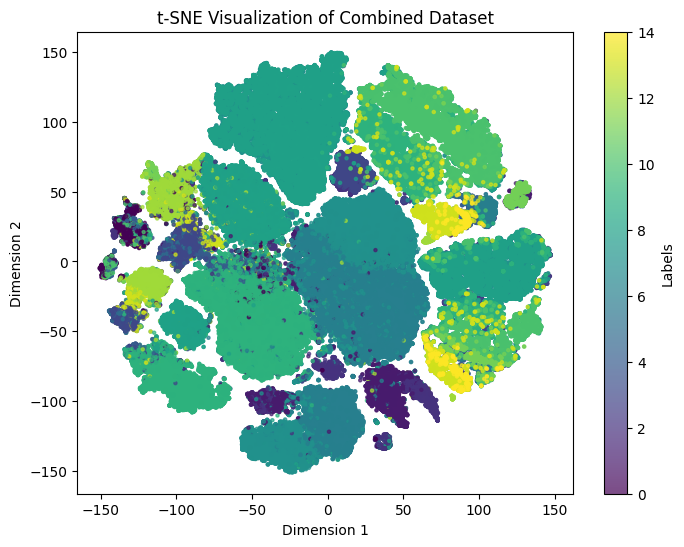

In [65]:
from openTSNE import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Combine labeled and unlabeled data with predicted labels
def combine_dataset(x_labeled, y_labeled, x_unlabeled, y_unlab_pred):

    labeled_data = pd.DataFrame(x_labeled)
    labeled_data['label'] = y_labeled

    unlabeled_data = pd.DataFrame(x_unlabeled)
    unlabeled_data['label'] = y_unlab_pred

    combined_dataset = pd.concat([labeled_data, unlabeled_data], ignore_index=True)
    return combined_dataset

# Generate t-SNE visualization
def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):

    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis', s=5, alpha=0.7)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(scatter, label='Labels')
    plt.show()

# Combine the labeled and unlabeled data
combined_dataset = combine_dataset(
    x_labeled=x_labeled.to_numpy(),
    y_labeled=y_labeled.to_numpy(),
    x_unlabeled=x_unlabeled_scaled,
    y_unlab_pred=y_unlab_pred
)

# Extract features and labels for t-SNE
features = combined_dataset.drop(columns=['label']).to_numpy()
labels = combined_dataset['label'].to_numpy()

# Generate t-SNE plot
plot_tsne_opentsne(features, labels, title="t-SNE Visualization of Combined Dataset")


#**t-SNE AFTER SEMI_SUPERVISED**

<ipython-input-66-4fab101792ea>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_labels))  # Use 'tab10' for up to 10 unique colors


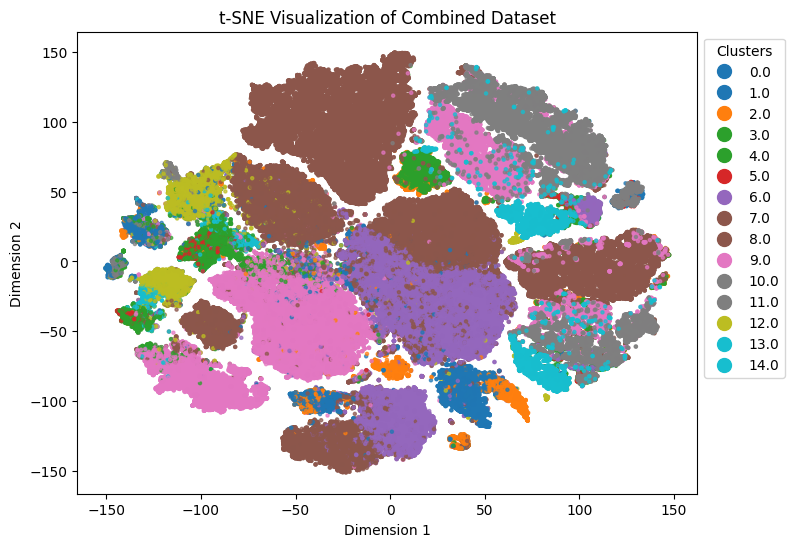

In [66]:
from openTSNE import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors

# Combine labeled and unlabeled data with predicted labels
def combine_dataset(x_labeled, y_labeled, x_unlabeled, y_unlab_pred):
    labeled_data = pd.DataFrame(x_labeled)
    labeled_data['label'] = y_labeled

    unlabeled_data = pd.DataFrame(x_unlabeled)
    unlabeled_data['label'] = y_unlab_pred

    combined_dataset = pd.concat([labeled_data, unlabeled_data], ignore_index=True)
    return combined_dataset

# Generate t-SNE visualization with distinct cluster colors
def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    # Ensure labels are integers for discrete colormap
    unique_labels = np.unique(labels)
    label_to_color = {label: idx for idx, label in enumerate(unique_labels)}

    # Map each label to a discrete color index
    discrete_colors = np.array([label_to_color[label] for label in labels])

    # Generate a discrete colormap
    cmap = plt.cm.get_cmap('tab10', len(unique_labels))  # Use 'tab10' for up to 10 unique colors

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=discrete_colors, cmap=cmap, s=5, alpha=0.7)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # Add a legend for clusters
    handles = [plt.Line2D([], [], marker='o', color=cmap(idx / len(unique_labels)), linestyle='', markersize=10) for idx in range(len(unique_labels))]
    plt.legend(handles, unique_labels, title="Clusters", loc="best", bbox_to_anchor=(1, 1))
    plt.show()

# Combine the labeled and unlabeled data
combined_dataset = combine_dataset(
    x_labeled=x_labeled.to_numpy(),
    y_labeled=y_labeled.to_numpy(),
    x_unlabeled=x_unlabeled_scaled,
    y_unlab_pred=y_unlab_pred
)

# Extract features and labels for t-SNE
features = combined_dataset.drop(columns=['label']).to_numpy()
labels = combined_dataset['label'].to_numpy()

# Generate t-SNE plot with distinct cluster colors
plot_tsne_opentsne(features, labels, title="t-SNE Visualization of Combined Dataset")


In [67]:
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
  x_unlab_encoded = encoder.predict(x_unlab)
  _, y_unlab_hat = predictor(x_unlab_encoded, training=False)
  y_unlab_pred = np.argmax(y_unlab_hat, axis=1)
  return y_unlab_pred
'''
performance metric -> generate unlabeled predictions -> inout prediction labels for the unlabeled part of the dataset
generate tsne for this new dataset
'''

'\nperformance metric -> generate unlabeled predictions -> inout prediction labels for the unlabeled part of the dataset\ngenerate tsne for this new dataset\n'

In [68]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
x_unlabeled.shape

(161443, 40)

#**GRADIO**

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
from openTSNE import TSNE
import matplotlib.pyplot as plt
from matplotlib import colormaps  # Import for the updated colormap handling
from tensorflow.keras.models import load_model

# Define function to generate predictions for unlabeled data
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
    """Generate predictions for unlabeled data."""
    x_unlab_encoded = encoder.predict(x_unlab)  # Encode unlabeled data
    _, y_unlab_hat = predictor(x_unlab_encoded, training=False)  # Predict with classifier
    y_unlab_pred = np.argmax(y_unlab_hat, axis=1)  # Get predicted class labels
    return y_unlab_pred

# Define the function for t-SNE visualization
def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):
    """Generate t-SNE visualization with distinct cluster colors."""
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    unique_labels = np.unique(labels)
    label_to_color = {label: idx for idx, label in enumerate(unique_labels)}
    discrete_colors = np.array([label_to_color[label] for label in labels])

    cmap = colormaps.get_cmap('tab10')  # Get the colormap
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter(
        tsne_result[:, 0],
        tsne_result[:, 1],
        c=discrete_colors,
        cmap=cmap,
        s=5,
        alpha=0.7
    )
    ax.set_title(title)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')

    # Add a legend for clusters
    handles = [
        plt.Line2D([], [], marker='o', color=cmap(idx / len(unique_labels)), linestyle='', markersize=10)
        for idx in range(len(unique_labels))
    ]
    ax.legend(handles, unique_labels, title="Clusters", loc="best", bbox_to_anchor=(1, 1))

    return fig

# Define Gradio function to process and visualize
def process_and_visualize(start_row, end_row):
    """
    Process the `x_unlabeled` variable, predict labels, and visualize with t-SNE.
    Takes a range of rows as input from the user.
    """
    # Ensure x_unlabeled is preloaded
    global x_unlabeled

    # Convert input to integers
    start_row = int(start_row)
    end_row = int(end_row)

    # Select rows from x_unlabeled based on the provided range
    x_unlabeled_subset = x_unlabeled[start_row:end_row]

    # Ensure model and encoder are preloaded
    encoder = load_model(encoder_path)  # Load pre-trained encoder
    predictor = trained_model  # Assume predictor is already trained

    # Generate predictions
    predicted_labels = generate_unlabeled_predictions(x_unlabeled_subset, encoder, predictor)

    # Create t-SNE visualization
    tsne_plot = plot_tsne_opentsne(x_unlabeled_subset, predicted_labels, title="t-SNE Visualization of Input Data")

    # Return the visualization and predictions
    return tsne_plot, pd.DataFrame({"Predicted Labels": predicted_labels}).head(10)

# Initialize Gradio Interface
inputs = [
    gr.Number(label="Start Row", value=3, precision=0),  # Input for the starting row
    gr.Number(label="End Row", value=109, precision=0)   # Input for the ending row
]

outputs = [
    gr.Plot(label="t-SNE Visualization"),
    gr.Dataframe(label="Predicted Labels (Top 10)")
]

gr.Interface(
    fn=process_and_visualize,
    inputs=inputs,  # Use the range inputs
    outputs=outputs,
    title="Self-Supervised Learning Visualizer",
    description="Automatically processes the `x_unlabeled` dataset for visualization and prediction."
).launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a827ff296c4180f2c3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
Created dataset file at: .gradio/flagged/dataset1.csv
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
